# Predicting heart failure using machine learning

### C8 Inteligencia Artificial_Nivel Integrador_G1
#### minTIC - TalentoTech
---
> * Henry Hernán Bolaños Bravo
* cc 12980199

[Heart Failure](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)


[El video se puede ver en youtube](https://youtu.be/yw-7pPd7Q04)


### Descripción General del Problema:
La enfermedad cardiovascular es una de las principales causas de muerte en todo el mundo. La detección temprana de factores de riesgo y la predicción de fallos cardíacos pueden salvar vidas y reducir la carga sobre los sistemas de salud. Este proyecto tiene como objetivo desarrollar un modelo de machine learning que prediga la probabilidad de un fallo cardíaco en pacientes, utilizando datos clínicos disponibles.

### Objetivos:
1. **Análisis Exploratorio de Datos (EDA)**: Investigar el dataset para comprender la distribución de las variables y la relación entre ellas.
2. **Preprocesamiento de Datos**: Limpiar y preparar los datos para el entrenamiento del modelo, incluyendo la gestión de valores faltantes y la normalización.
3. **Modelado**: Seleccionar y entrenar uno o varios modelos de machine learning (como regresión logística, árboles de decisión o redes neuronales) para predecir la probabilidad de un fallo cardíaco.
4. **Evaluación del Modelo**: Utilizar métricas como la precisión, recall, F1-score y área bajo la curva (AUC) para evaluar el rendimiento del modelo.
5. **Implementación**: Crear una interfaz básica para que los profesionales de la salud puedan utilizar el modelo para la predicción.

### Beneficiarios del Proyecto:
1. **Profesionales de la Salud**: Médicos y personal clínico que pueden usar el modelo para tomar decisiones informadas sobre el tratamiento de pacientes.
2. **Pacientes**: Aquellos en riesgo de enfermedades cardíacas que podrían beneficiarse de una detección temprana.
3. **Instituciones de Salud**: Hospitales y clínicas que buscan mejorar sus estrategias de prevención y atención.


## Importar librerías
---

In [ ]:
import pandas as pd
import numpy as np
# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
# Warning
import warnings
warnings.filterwarnings('ignore')

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

## Carga del dataset

In [ ]:
# Conexión del drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: carga el datase que esta en: /content/drive/MyDrive/minTIC2022/proyecto_mintic24/heart_failure_cr.csv
path = '/content/drive/MyDrive/minTIC2022/proyecto_mintic24/heart_failure_cr.csv'
import pandas as pd
df = pd.read_csv(path)

## Conociendo el dataframe
---
>Este dataset contiene información clínica de pacientes con insuficiencia cardíaca y se utiliza para predecir eventos de muerte relacionados con la insuficiencia cardíaca.
Incluye 12 características clínicas como la edad, el nivel de creatinina en suero, el porcentaje de fracción de eyección, y si el paciente tiene diabetes, hipertensión, anemia, entre otros

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
# Muestra las primeras 5 filas
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# Mmuestra 10 filas aleatorias
df.sample(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
198,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186,0
222,42.0,1,86,0,35,0,365000.00,1.1,139,1,1,201,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
78,75.0,1,203,1,38,1,283000.00,0.6,131,1,1,74,0
144,72.0,1,943,0,25,1,338000.00,1.7,139,1,1,111,1
108,63.0,0,936,0,38,0,304000.00,1.1,133,1,1,88,0
61,50.0,0,318,0,40,1,216000.00,2.3,131,0,0,60,1
282,42.0,0,64,0,30,0,215000.00,3.8,128,1,1,250,0
137,68.0,1,646,0,25,0,305000.00,2.1,130,1,0,108,0


## Significado de los datos
---
* age: Edad del paciente en años.
* anaemia: Si el paciente tiene anemia o no (1: Sí, 0: No).
* creatinine_phosphokinase: Nivel de enzima CPK en sangre (mcg/L). Elevados niveles pueden indicar daño muscular, incluyendo daño al músculo cardíaco.
* diabetes: Si el paciente tiene diabetes o no (1: Sí, 0: No).
* ejection_fraction: Fracción de eyección medida en porcentaje. Indica la cantidad de sangre que el ventrículo izquierdo expulsa con cada contracción. Valores normales generalmente están entre 55% y 70%.
* high_blood_pressure: Si el paciente tiene hipertensión o no (1: Sí, 0: No).
* platelets: Recuento de plaquetas en sangre (kiloplaquetas/mL). Importante para la coagulación sanguínea.
* serum_creatinine: Nivel de creatinina en suero (mg/dL). Indica la función renal.
* serum_sodium: Nivel de sodio en suero (mEq/L). Importante para la función celular y equilibrio de líquidos.
* sex: Sexo del paciente (1: Hombre, 0: Mujer).
* smoking: Si el paciente fuma o no (1: Sí, 0: No).
* time: Tiempo de seguimiento en días. Periodo de tiempo durante el cual se ha seguido al paciente.
* DEATH_EVENT: Si el paciente ha fallecido durante el seguimiento (1: Sí, 0: No).

In [ ]:
# El nombre de las columnas
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
# ¿Cuál es el tamaño del df?
df.shape

(299, 13)

In [ ]:
# Información general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
# Visipon de cuantos valores únicos existen en cada característica
df.nunique()

,0
age,47
anaemia,2
creatinine_phosphokinase,208
diabetes,2
ejection_fraction,17
high_blood_pressure,2
platelets,176
serum_creatinine,40
serum_sodium,27
sex,2


In [ ]:
# Verificar si existen valores nulos en el DataFrame
print(df.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


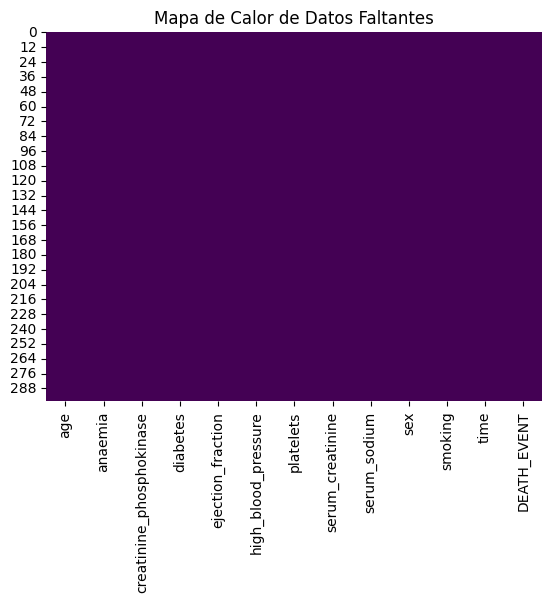

In [ ]:
# Mapa de calor para visualizar los datos faltantes
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Datos Faltantes')
plt.show()

In [ ]:
# Resumen estadístico del dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


### Verificando el balaceo

In [ ]:
df["DEATH_EVENT"].value_counts()

,count
DEATH_EVENT,
0,203
1,96


In [ ]:
# Verificar el balanceo de la variable objetivo
target_variable = 'DEATH_EVENT'  # Nombre de la variable objetivo

if target_variable in df.columns:
  print(df[target_variable].value_counts())
  print(df[target_variable].value_counts(normalize=True))
else:
  print("La variable objetivo no se encuentra en el dataframe")

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64
DEATH_EVENT
0    0.67893
1    0.32107
Name: proportion, dtype: float64


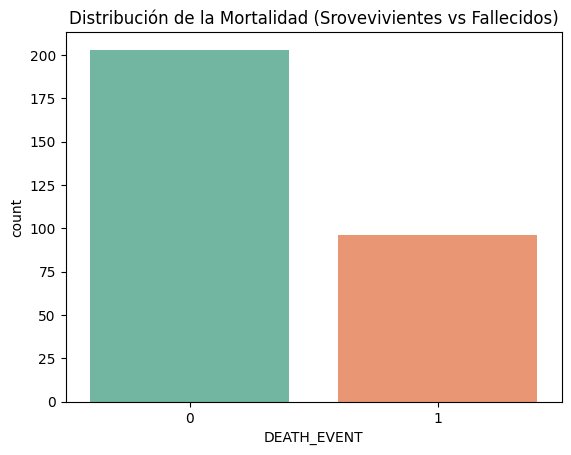

In [ ]:
# Verifico el balance para cada clase de la variable destino
#sns.countplot(x='DEATH_EVENT', data=df)
sns.countplot(x='DEATH_EVENT', data=df, palette="Set2") # Agregamos la paleta de colores "Set2"
plt.title('Distribución de la Mortalidad (Srovevivientes vs Fallecidos)')
plt.show()

## Visualización
---
Encontrando los outliers

In [ ]:
# define la función para encontrar los outliers
def count_outliers(df, column):
    # Cálculo de los quarriles
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    # Cálculo del rango intercuartílico
    IQR = Q3 - Q1
    # Se definen los límites inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cualquier valor fuera de estos límites se consider un outlier
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Bucle, selecciona las columnas del dataframe que contien datos numéricos
for col in df.select_dtypes(include=np.number).columns:
    print("{:<15} {:>6}".format(col, len(count_outliers(df, col))))

age                  0
anaemia              0
creatinine_phosphokinase     29
diabetes             0
ejection_fraction      2
high_blood_pressure      0
platelets           21
serum_creatinine     29
serum_sodium         4
sex                  0
smoking              0
time                 0
DEATH_EVENT          0


### Veamos los valores atípicos de cada columna
---
Estos gráficos son útiles porque permiten visualizar cómo diferentes variables clínicas y demográficas se relacionan con la ocurrencia de un evento de muerte, lo cual puede ayudar a identificar factores de riesgo y mejorar la atención médica.

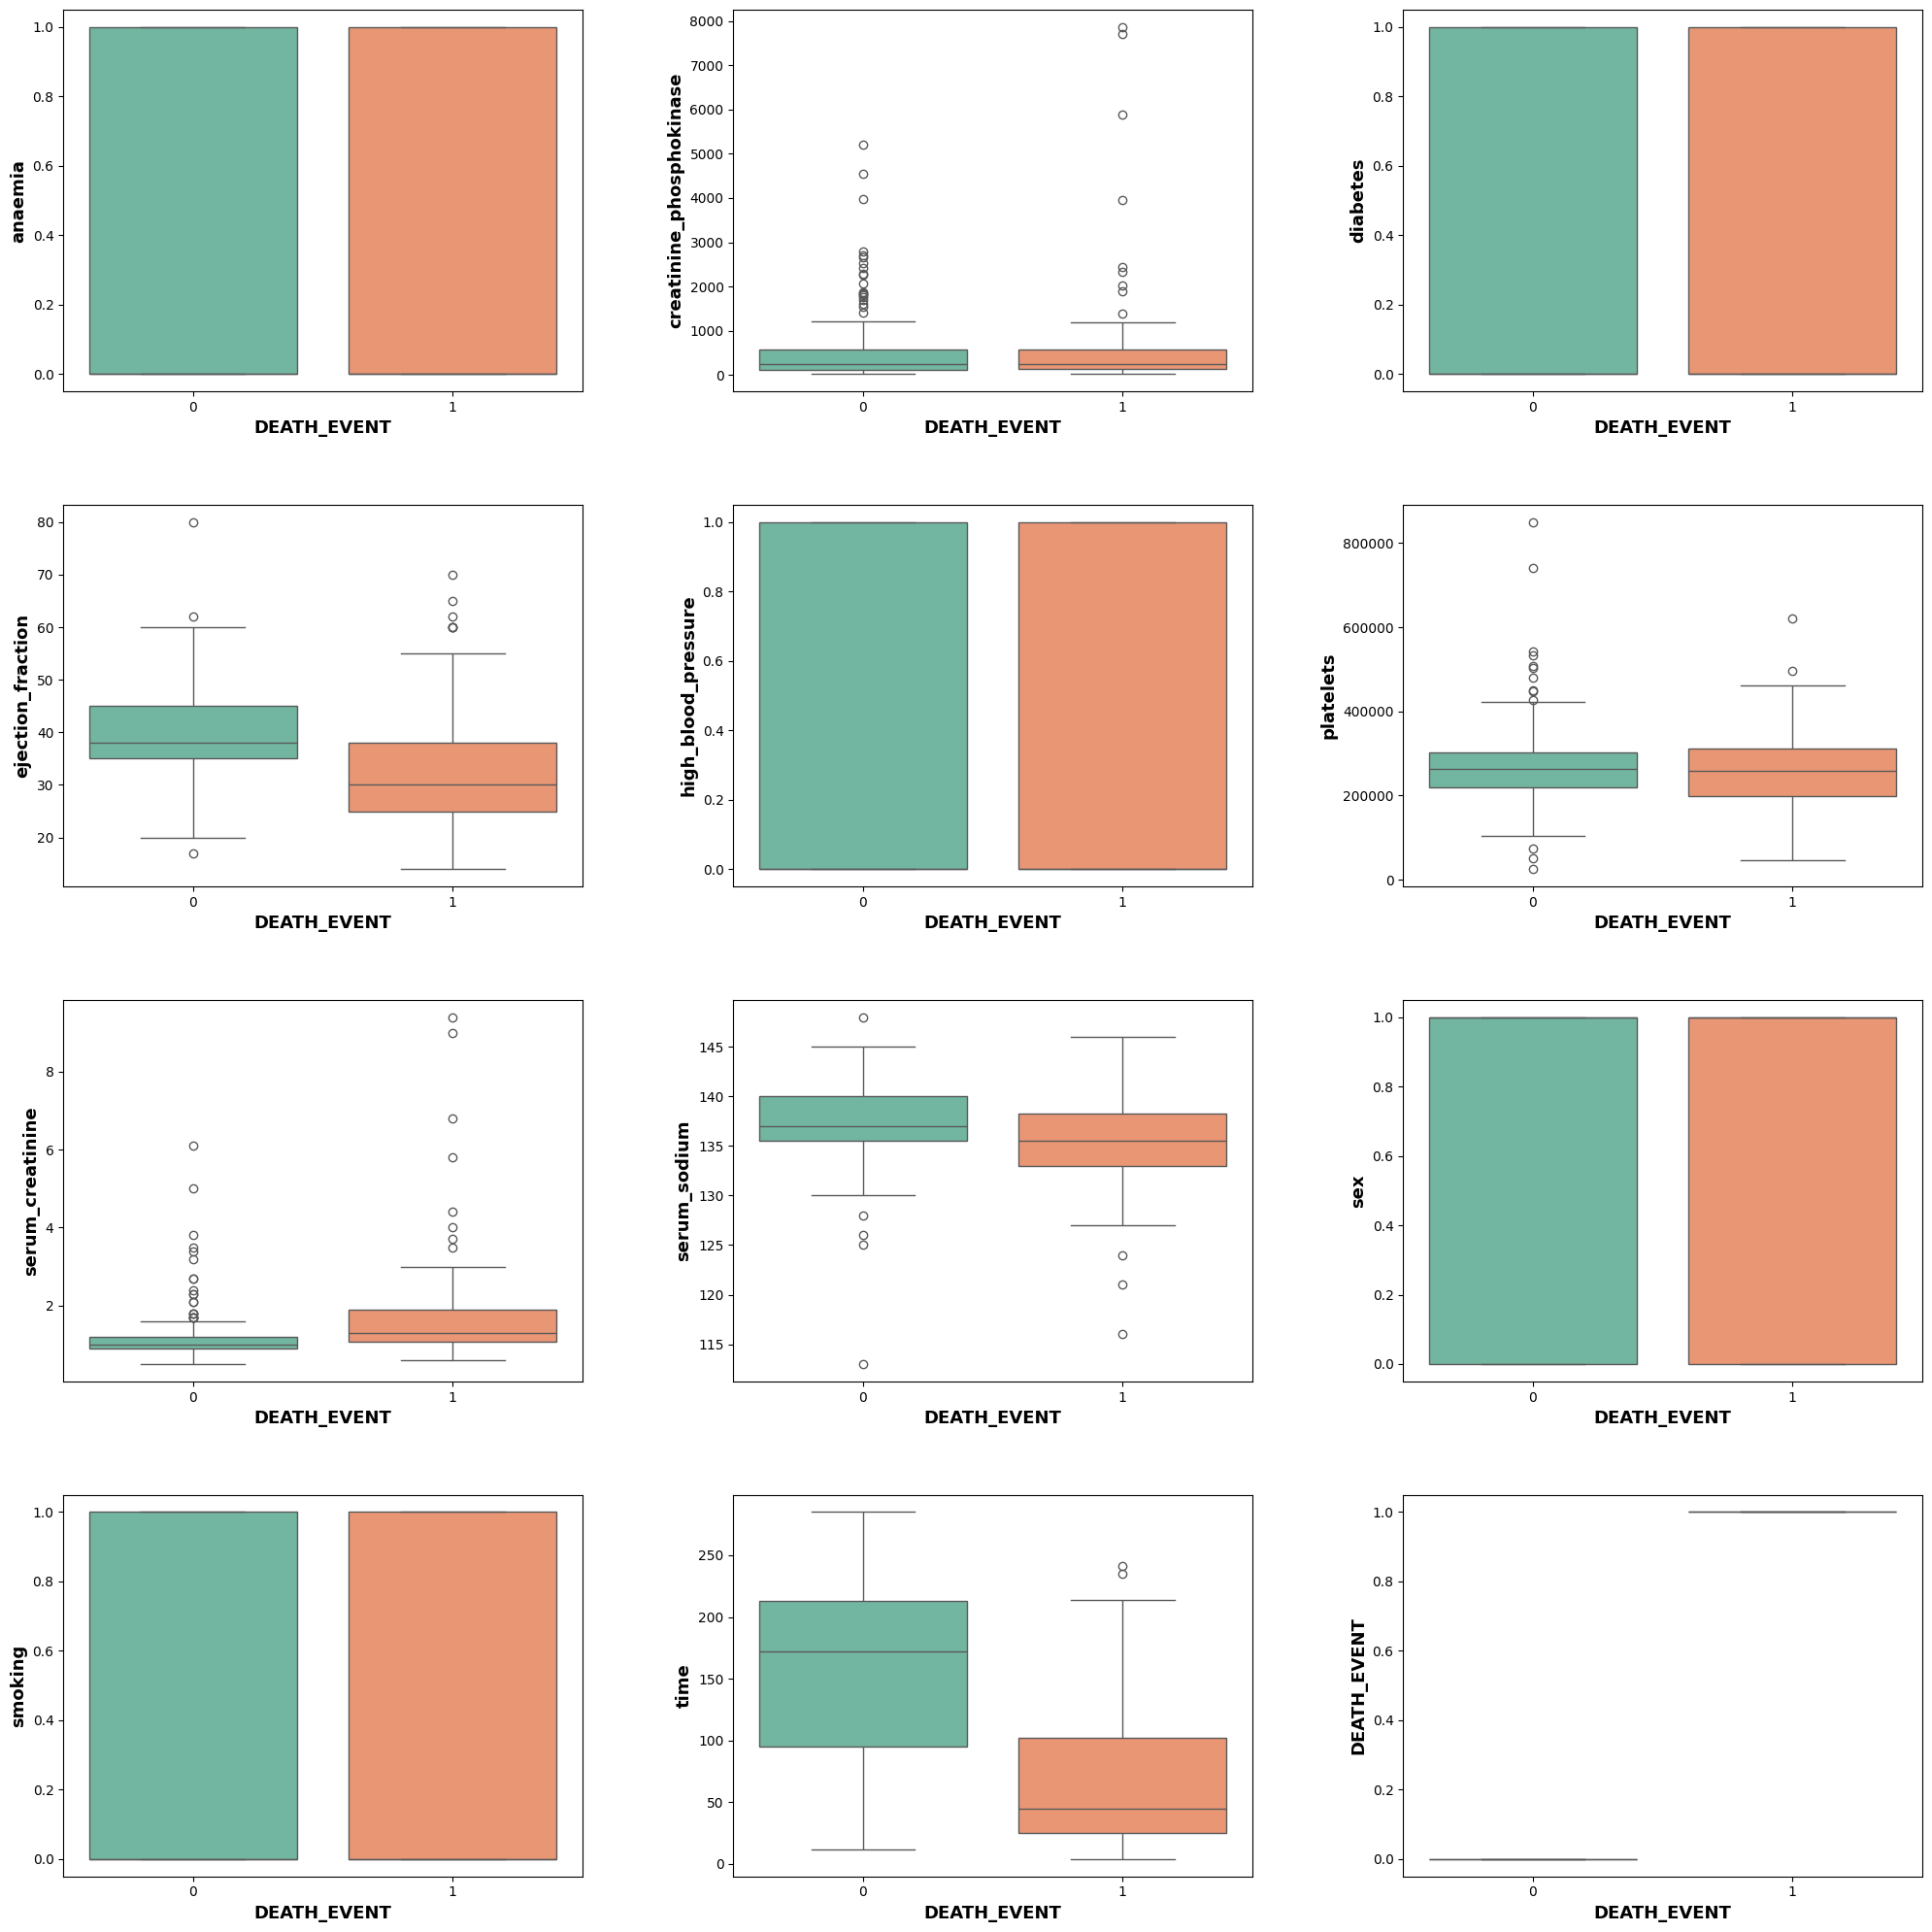

In [ ]:
# Definir una paleta de colores
palette = sns.color_palette("Set2")

fig, ax = plt.subplots(4, 3, figsize=(20, 20))
ax = ax.flatten()

for i, col in enumerate(df.columns[1:]):
    sns.boxplot(x='DEATH_EVENT', y=col, data=df, ax=ax[i], palette=palette)
    ax[i].set_xlabel('DEATH_EVENT', fontsize=13, fontweight='bold')
    ax[i].set_ylabel(col, fontsize=13, fontweight='bold')
    plt.tight_layout(w_pad=5, h_pad=5)

### Explicación de la gráfica
---
**1. Anemia vs DEATH_EVENT:** Gráfico de barras que muestra la proporción de pacientes con anemia (1) y sin anemia (0) en relación con el evento de muerte. No parece haber una diferencia significativa entre los dos grupos.

**2. Creatinina Fosfocinasa vs DEATH_EVENT:** Gráfico de caja que muestra los niveles de creatinina fosfocinasa en pacientes con y sin evento de muerte. Los niveles parecen ser más altos en pacientes sin evento de muerte, aunque hay muchos valores atípicos.

**3. Diabetes vs DEATH_EVENT:** Gráfico de barras que muestra la proporción de pacientes con diabetes (1) y sin diabetes (0) en relación con el evento de muerte. No parece haber una diferencia significativa entre los dos grupos.

**4. Fracción de Eyección vs DEATH_EVENT:** Gráfico de caja que muestra la fracción de eyección en pacientes con y sin evento de muerte. La fracción de eyección parece ser menor en pacientes con evento de muerte.

**5. Presión Arterial Alta vs DEATH_EVENT:** Gráfico de barras que muestra la proporción de pacientes con presión arterial alta (1) y sin presión arterial alta (0) en relación con el evento de muerte. No parece haber una diferencia significativa entre los dos grupos.

**6. Plaquetas vs DEATH_EVENT:** Gráfico de caja que muestra los niveles de plaquetas en pacientes con y sin evento de muerte. No parece haber una diferencia significativa en los niveles de plaquetas entre los dos grupos.

**7. Creatinina Sérica vs DEATH_EVENT:** Gráfico de caja que muestra los niveles de creatinina sérica en pacientes con y sin evento de muerte. Los niveles parecen ser más altos en pacientes con evento de muerte.

**8. Sodio Sérico vs DEATH_EVENT:** Gráfico de caja que muestra los niveles de sodio sérico en pacientes con y sin evento de muerte. Los niveles parecen ser ligeramente más bajos en pacientes con evento de muerte.

**9. Sexo vs DEATH_EVENT:** Gráfico de barras que muestra la proporción de pacientes masculinos (1) y femeninos (0) en relación con el evento de muerte. No parece haber una diferencia significativa entre los dos grupos.

**10. Fumar vs DEATH_EVENT:** Gráfico de barras que muestra la proporción de pacientes fumadores (1) y no fumadores (0) en relación con el evento de muerte. No parece haber una diferencia significativa entre los dos grupos.

**11. Tiempo vs DEATH_EVENT:** Gráfico de caja que muestra el tiempo de seguimiento en días de pacientes con y sin evento de muerte. El tiempo de seguimiento parece ser menor en pacientes con evento de muerte.

**12. Gráfico Vacío:** Este gráfico no contiene datos y no proporciona información adicional.

### Histogramas
---
Los histogramas son representaciones gráficas de la distribución de un conjunto de datos. Se utilizan para mostrar la frecuencia con la que ocurren diferentes valores en un conjunto de datos. En un histograma, los datos se agrupan en intervalos (o "bins") y la altura de cada barra representa el número de datos que caen dentro de cada intervalo.

> Utilidad de los histogramas:
* Visualización de la distribución de datos: Permiten ver cómo se distribuyen los datos en un rango de valores.
* Identificación de patrones: Ayudan a identificar patrones, como la simetría, la asimetría, la presencia de picos (modas) y la dispersión de los datos.
* Detección de valores atípicos: Facilitan la identificación de valores atípicos o extremos que se desvían significativamente del resto de los datos.
* Comparación de distribuciones: Permiten comparar la distribución de diferentes conjuntos de datos.

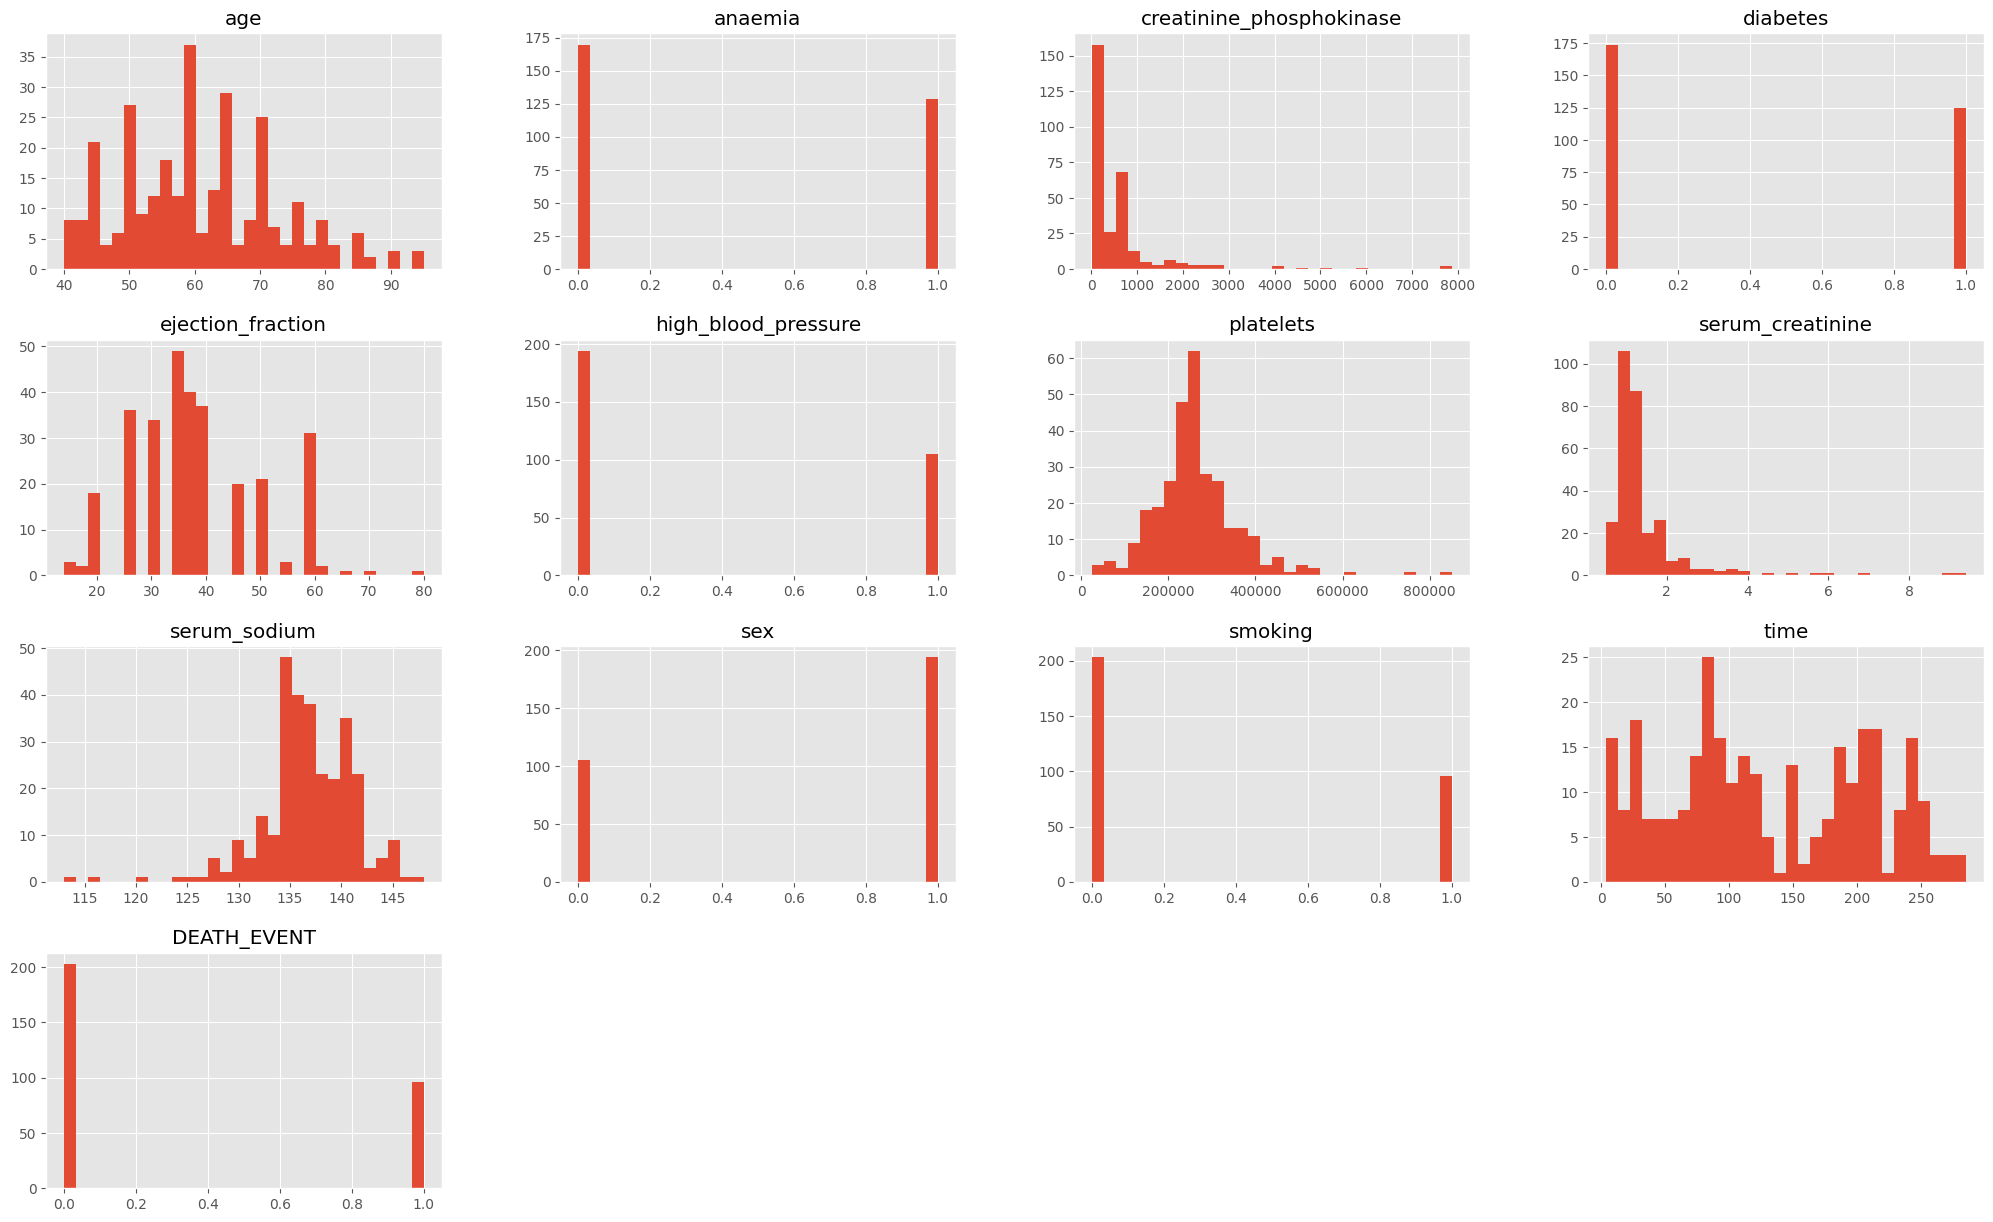

In [ ]:
plt.style.use("ggplot")
df.hist(bins=30, figsize=(25,15))
plt.show()

### Explicación de la gráfica
---
1. age: Muestra la distribución de edades de los individuos en el conjunto de datos. La mayoría de las personas tienen entre 40 y 70 años.

2. anaemia: Indica la presencia (1) o ausencia (0) de anemia en los individuos. La mayoría de los individuos no tienen anemia.

3. creatinine_phosphokinase: Representa los niveles de creatina fosfoquinasa en sangre. La mayoría de los valores están por debajo de 1000.

4. diabetes: Indica la presencia (1) o ausencia (0) de diabetes en los individuos. La mayoría de los individuos no tienen diabetes.

5. ejection_fraction: Muestra la fracción de eyección, que es una medida de la función cardíaca. La mayoría de los valores están entre 20 y 40.

6. high_blood_pressure: Indica la presencia (1) o ausencia (0) de hipertensión arterial en los individuos. La mayoría de los individuos no tienen hipertensión.

7. platelets: Representa la cantidad de plaquetas en sangre. La mayoría de los valores están entre 150,000 y 400,000.

8. serum_creatinine: Muestra los niveles de creatinina en suero. La mayoría de los valores están por debajo de 2.

9. serum_sodium: Representa los niveles de sodio en suero. La mayoría de los valores están entre 130 y 145.

10. sex: Indica el sexo de los individuos (0 para femenino y 1 para masculino). La mayoría de los individuos son del sexo representado por 1.

11. smoking: Indica si los individuos fuman (1) o no fuman (0). La mayoría de los individuos no fuman.

12. time: Representa el tiempo de seguimiento en días. Los valores están distribuidos a lo largo de un rango amplio.

13. DEATH_EVENT: Indica si ocurrió un evento de muerte (1) o no (0). La mayoría de los individuos no experimentaron un evento de muerte.

### Distribución de variables con relación al evento de fallecimiento.
---
Información general
Cada gráfico de **KDE** ayuda a visualizar la distribución de una variable específica, comparando a las personas que experimentaron un evento de muerte (si DEATH_EVENT tiene un color diferente) y a las que no.

> KDE significa Kernel Density Estimate, que es una técnica de suavizado para estimar la función de densidad de probabilidad de una variable aleatoria. En otras palabras, ayuda a visualizar la distribución de los datos de manera continua en lugar de mostrar solo barras como en un histograma.
La diferencia principal entre un KDE y un histograma es que el histograma divide los datos en intervalos o "bins" y cuenta la frecuencia de los datos en cada intervalo, mostrando estos recuentos como barras. En contraste, un KDE proporciona una representación más suave y continua de la distribución de datos, usando funciones kernel para generar una curva suave. Esta curva puede revelar patrones y tendencias que no son tan evidentes en un histograma debido a su naturaleza discreta.

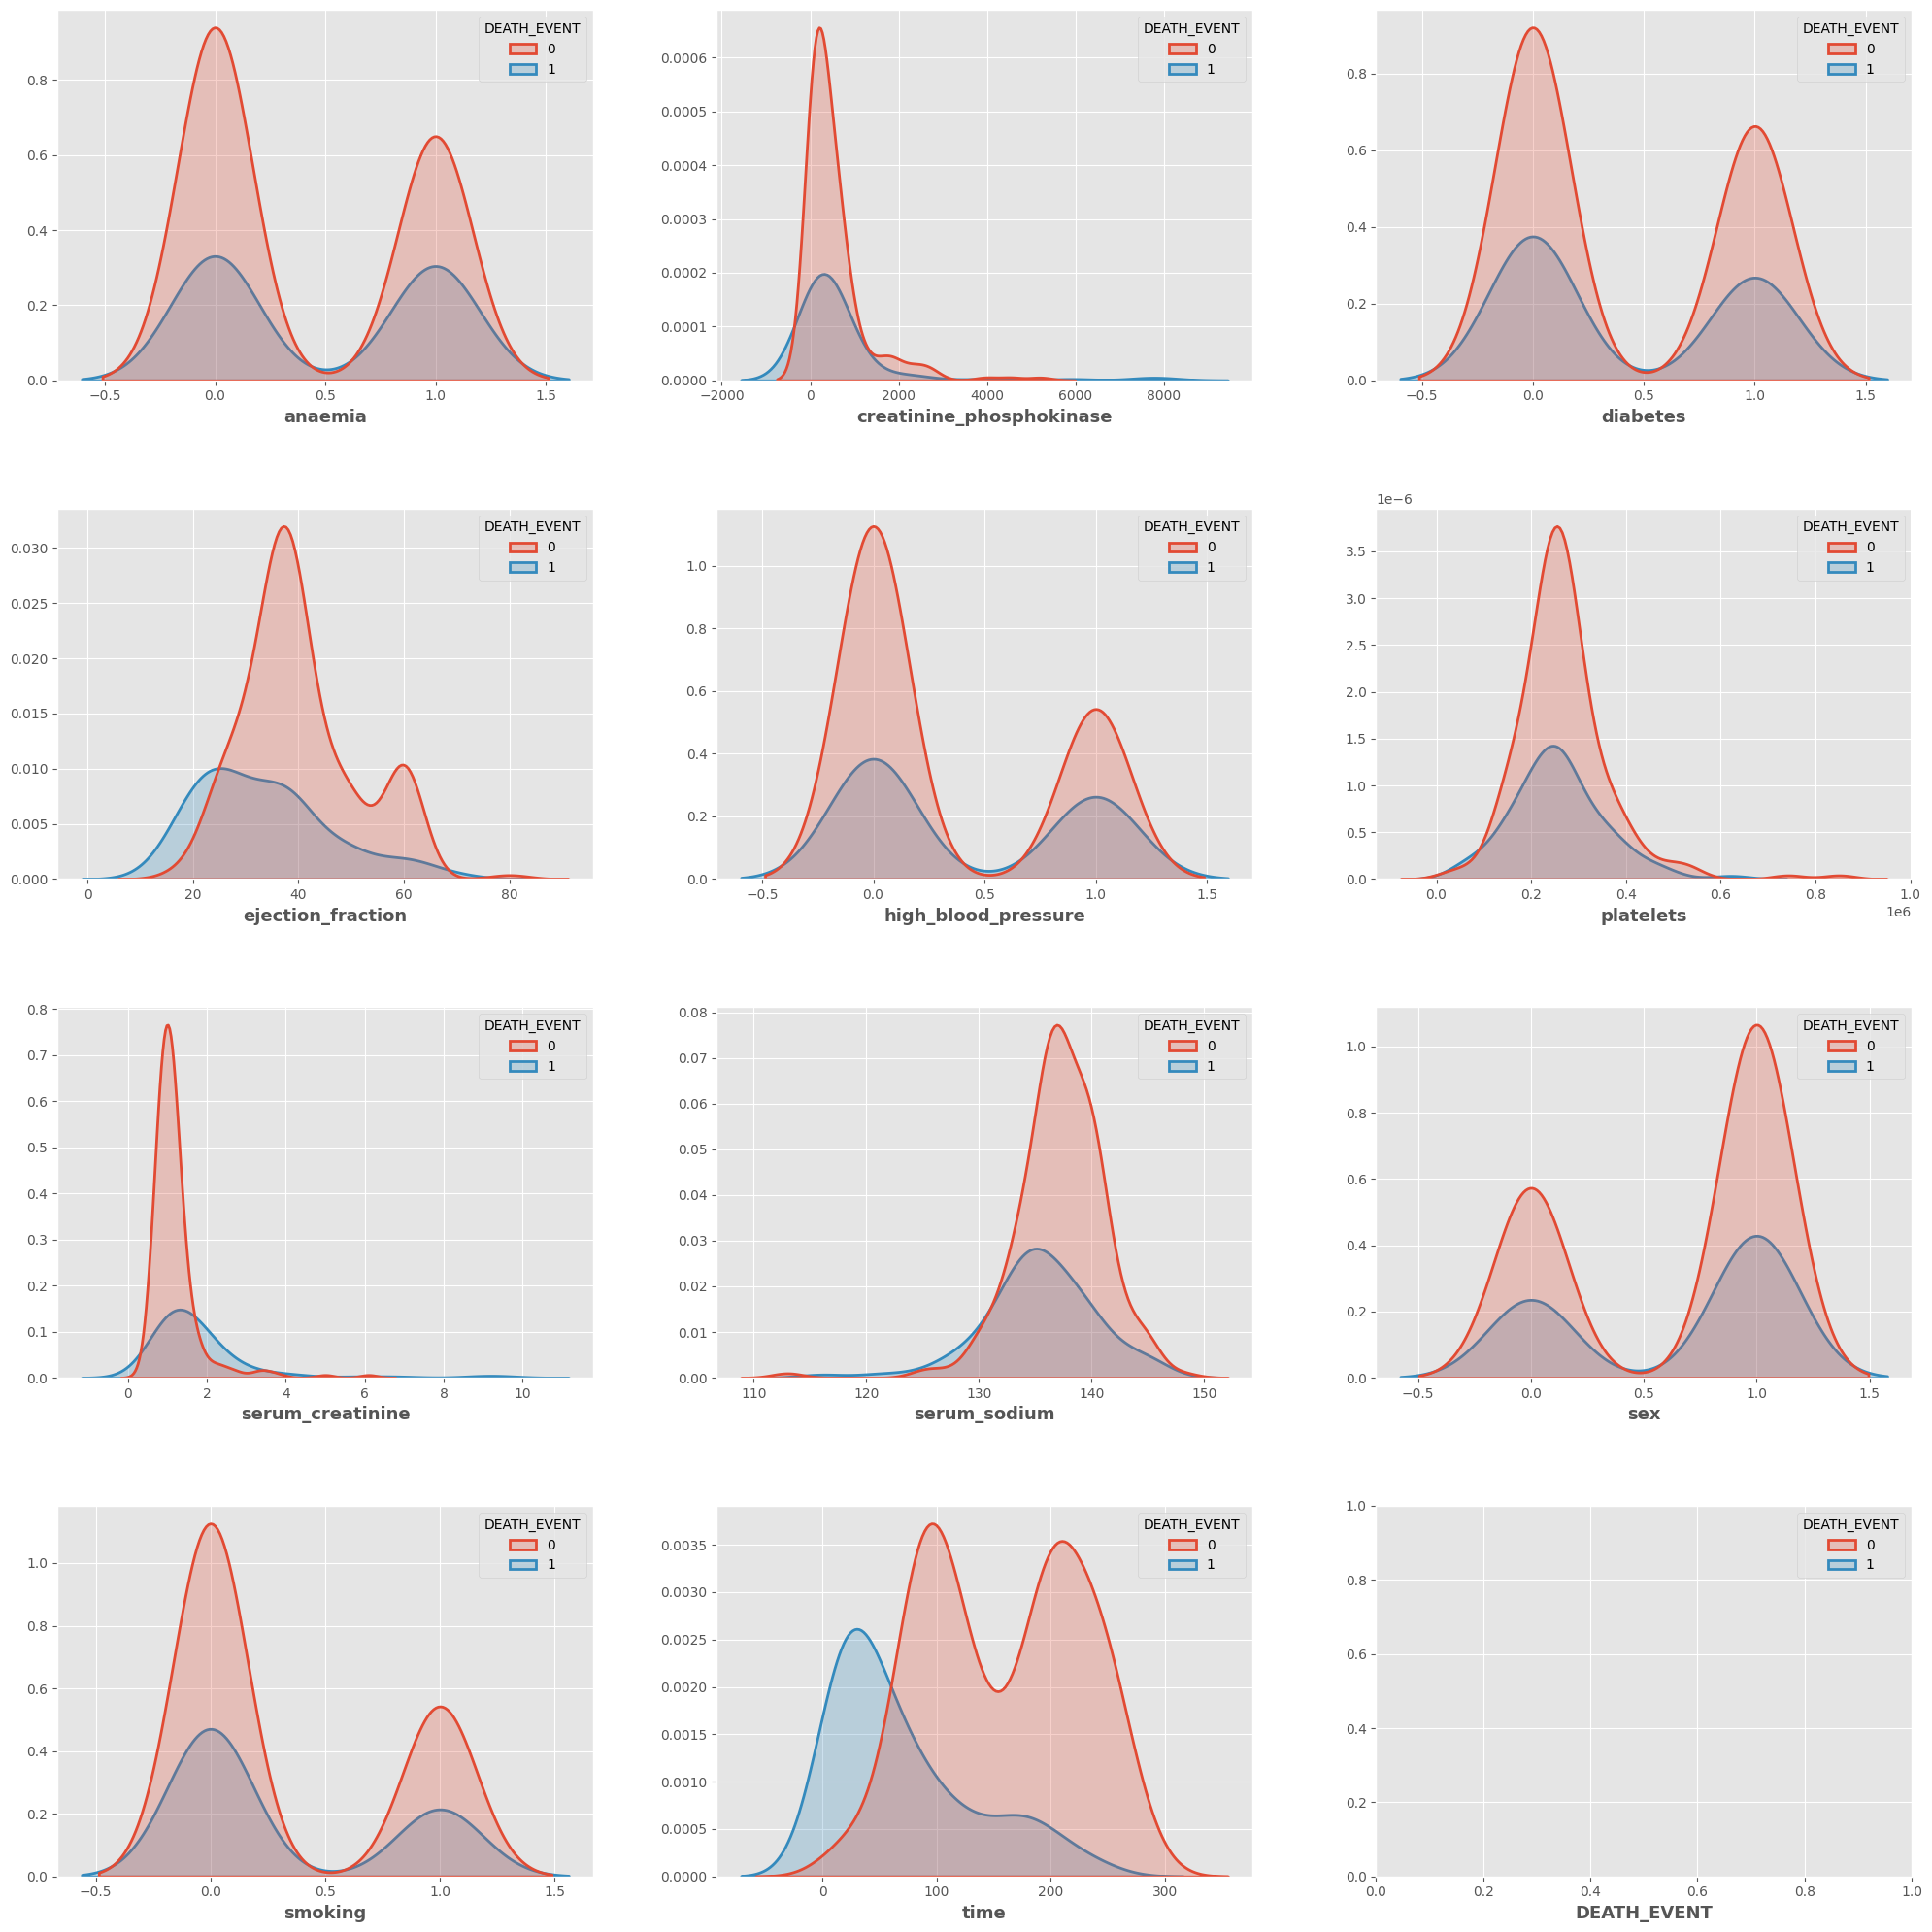

In [ ]:
# Este código crea una figura con una cuadrícula de subplots de 4 filas y 3 columnas, y establece el tamaño de la figura en 20x20 pulgadas.
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
ax = ax.flatten() #  aplana el array 2D de axes en un array 1D para facilitar la iteración sobre él

# Este bucle itera sobre las columnas del DataFrame df, comenzando desde la segunda columna (índice 1).
for i, col in enumerate(df.columns[1:]):
    sns.kdeplot(x=col, data=df, ax=ax[i], fill=True, lw=2, hue = 'DEATH_EVENT',color = "Green",shade = True)
    ax[i].set_xlabel(col, fontsize = 13, fontweight = 'bold') # Etiquetas sobre el eje x
    ax[i].set_ylabel('') # Elimina la etiqueta del eje y para cada subplot

plt.tight_layout(w_pad=5, h_pad=5) # ajusta el diseño de los subplot para evitar superposiciones, con un relleno especificado entre los subplots.
plt.show()

### Explicación de la gráfica
---
1.

2. Anemia: Indica la presencia (1) o ausencia (0) de anemia. La mayoría de las personas no tienen anemia.

3. Creatinina fosfoquinasa: Muestra la distribución de los niveles de creatinina fosfoquinasa. La mayoría de los valores están agrupados en los niveles más bajos.

4. Diabetes: Indica la presencia (1) o ausencia (0) de diabetes. La mayoría de las personas no tienen diabetes.

5. Fracción de eyección: Muestra la distribución de los porcentajes de fracción de eyección. La mayoría de los valores están entre el 20% y el 60%.

6. Hipertensión arterial: Indica la presencia (1) o ausencia (0) de hipertensión arterial. La mayoría de las personas no tienen hipertensión arterial.

7. Plaquetas: Muestra la distribución de los recuentos de plaquetas. La mayoría de los valores se encuentran entre 150 000 y 400 000

8. Creatinina sérica: Muestra la distribución de los niveles de creatinina sérica. La mayoría de los valores se agrupan en niveles inferiores.

9. Sodio sérico: Muestra la distribución de los niveles de sodio sérico. La mayoría de los valores se encuentran entre 130 y 145.

10. Sexo: Indica el sexo de los individuos (0 o 1). La distribución no está especificada.

11. Fumar: Indica la presencia (1) o ausencia (0) de fumar. La mayoría de los individuos no fuman.

12. Tiempo: Muestra la distribución del tiempo (posiblemente el tiempo de seguimiento). Los valores se distribuyen en todo el rango.

13. Evento de muerte: Indica la ocurrencia (1) o no ocurrencia (0) de un evento de muerte. La mayoría de los individuos no experimentaron un evento de muerte.

### Relaciones entre variables con respecto al evento de fallecimiento
---
"Gráfico de pares o pair plot". visualiza cómo las distintas variables interactúan en relación con el "DEATH_EVENT."

La belleza de una gráfica de pares es que te permite ver múltiples relaciones de una vez, así que un título que refleje la relación general entre las variables es clave.

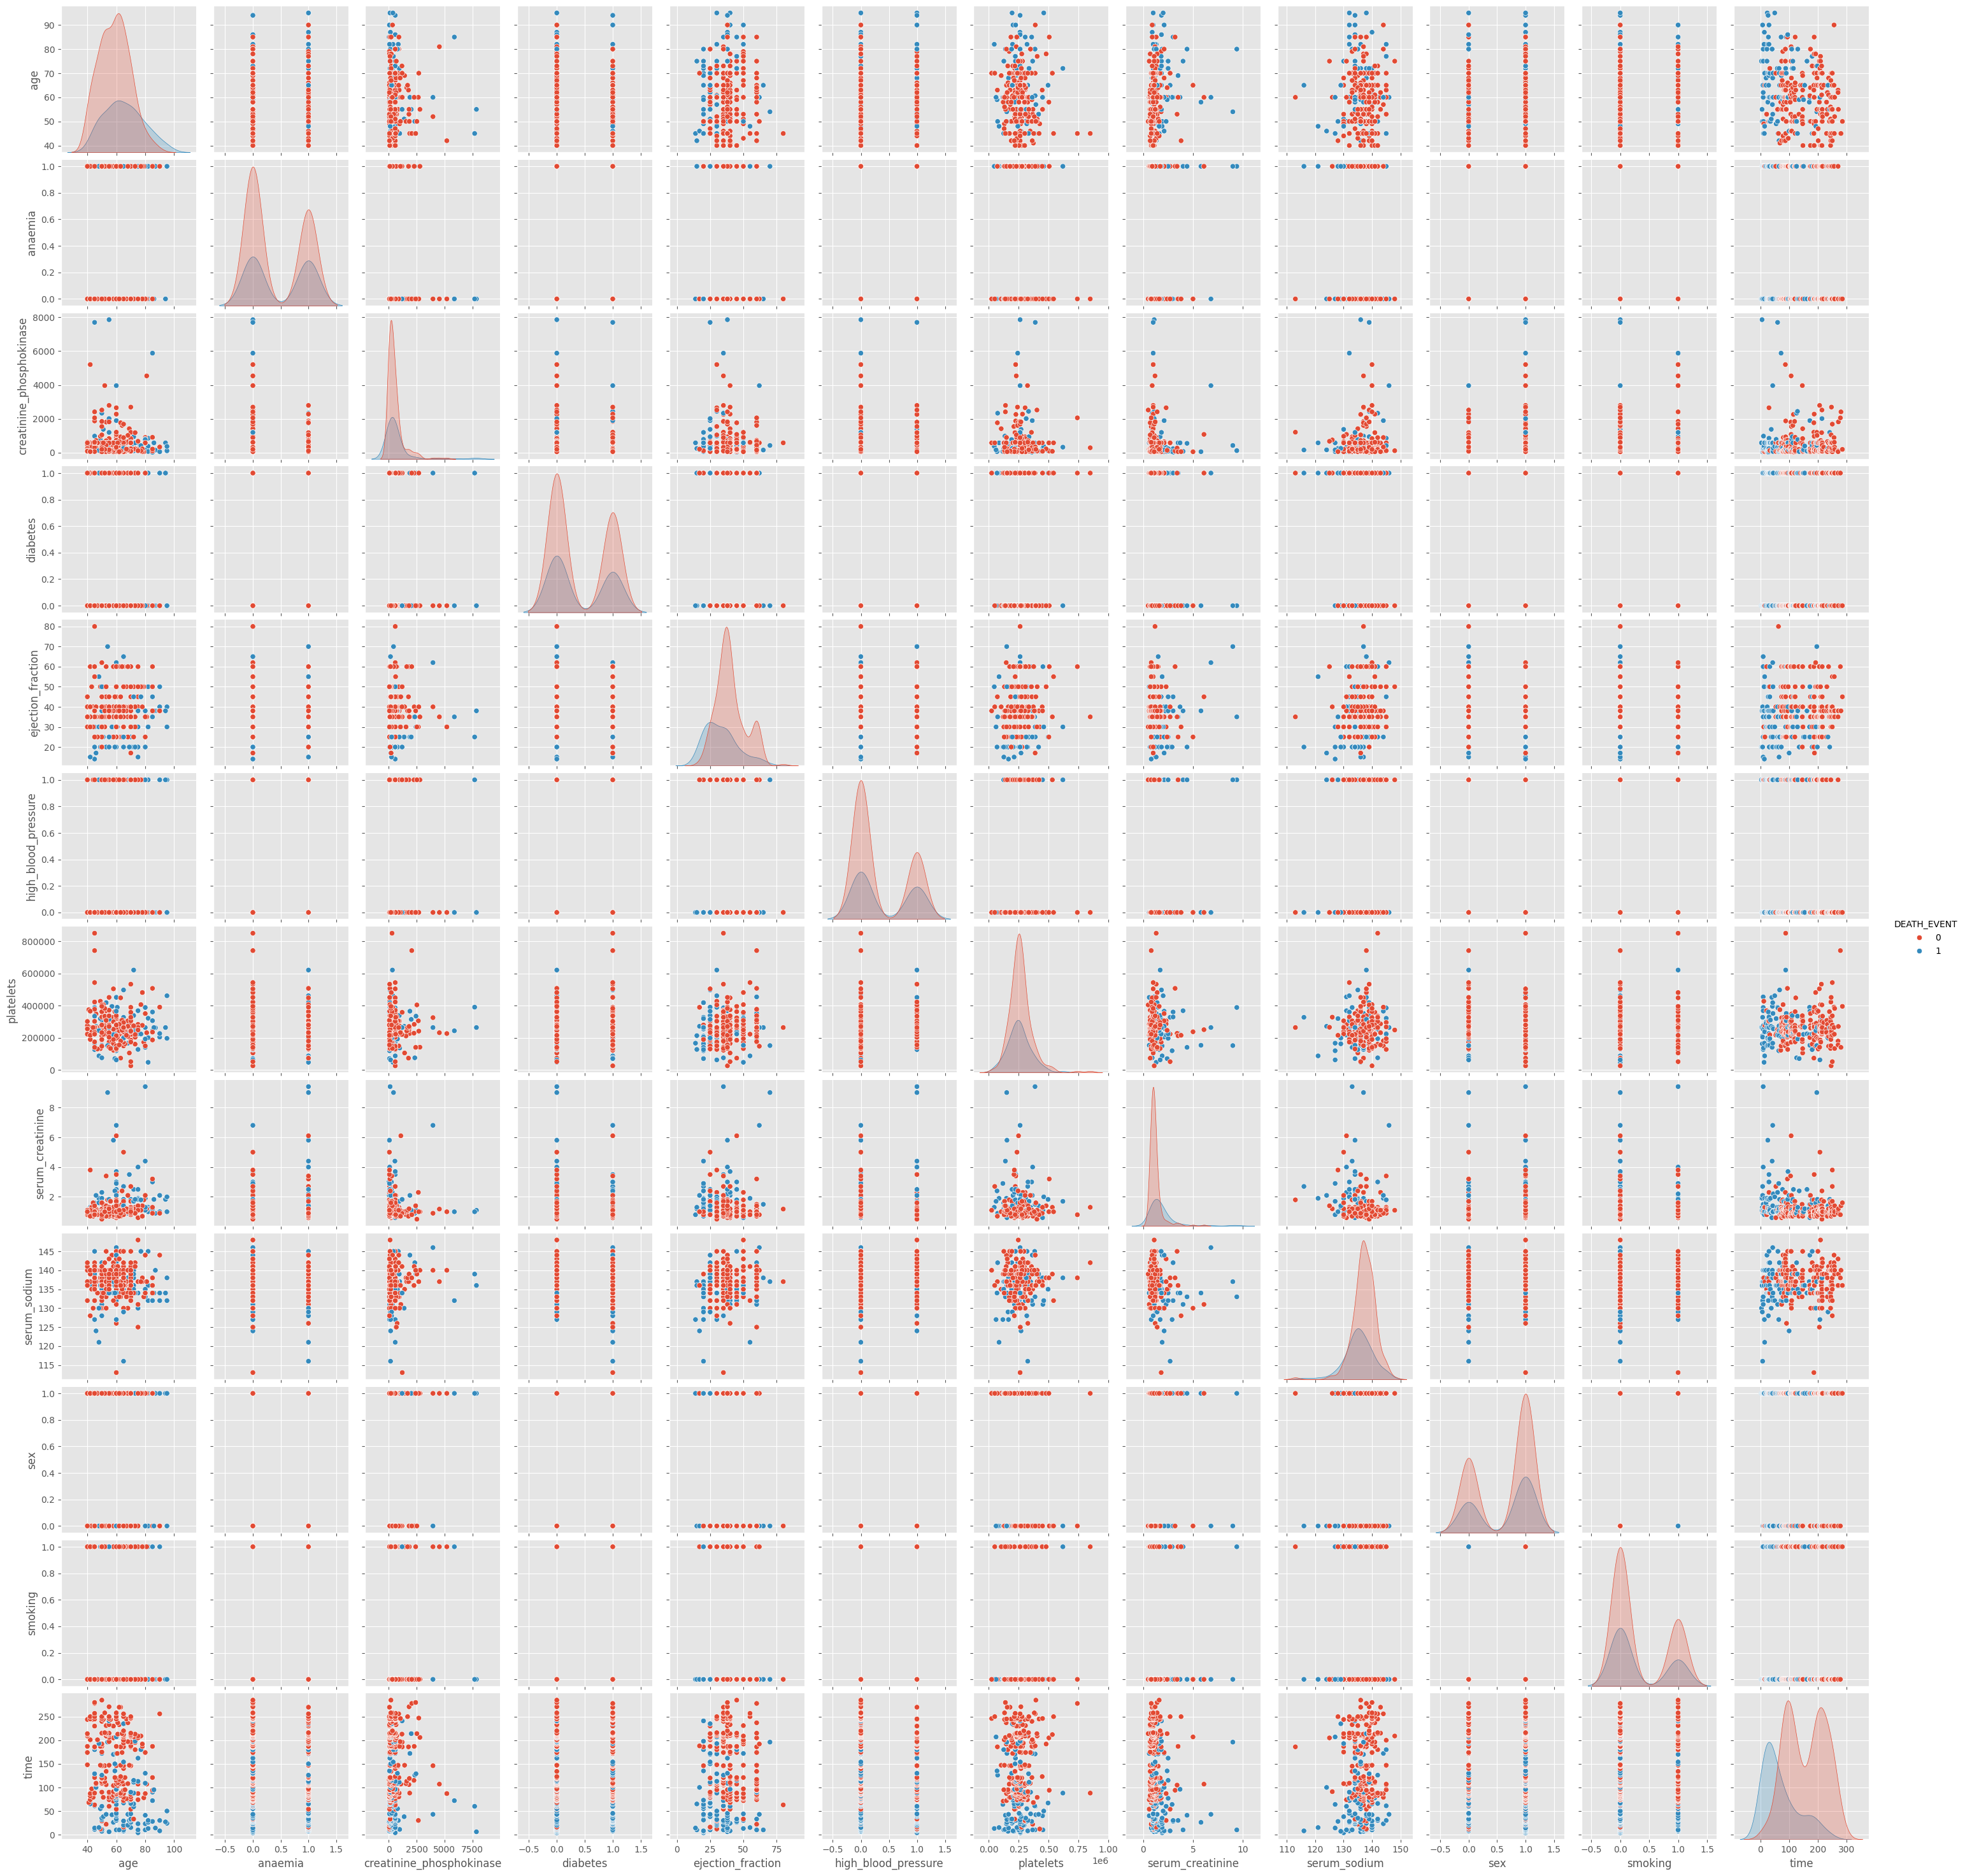

In [ ]:
# La función pairplot genera una matriz de gráficos de dispersión para cada par de variables en el DataFrame df.
# El parámetro hue="DEATH_EVENT" hace que las gráficas usen colores diferentes para los puntos basados en los valores de la columna "DEATH_EVENT"
# Lo que te permite visualizar cómo varían las relaciones entre variables para diferentes grupos de la variable "DEATH_EVENT".
sns.pairplot(df,hue = "DEATH_EVENT")
plt.show()

## Correlación
---
El mapa de calor de correlación visualiza las relaciones entre diferentes características del conjunto de datos. Cada celda representa el coeficiente de correlación entre dos variables que puede variar entre:
* -1 (correlación negativa perfecta) y
* 1 (correlación positiva perfecta).

Los colores del mapa van de:
* azul (correlación negativa) a
* rojo (correlación positiva), con tonos más claros indicando correlaciones más débiles.

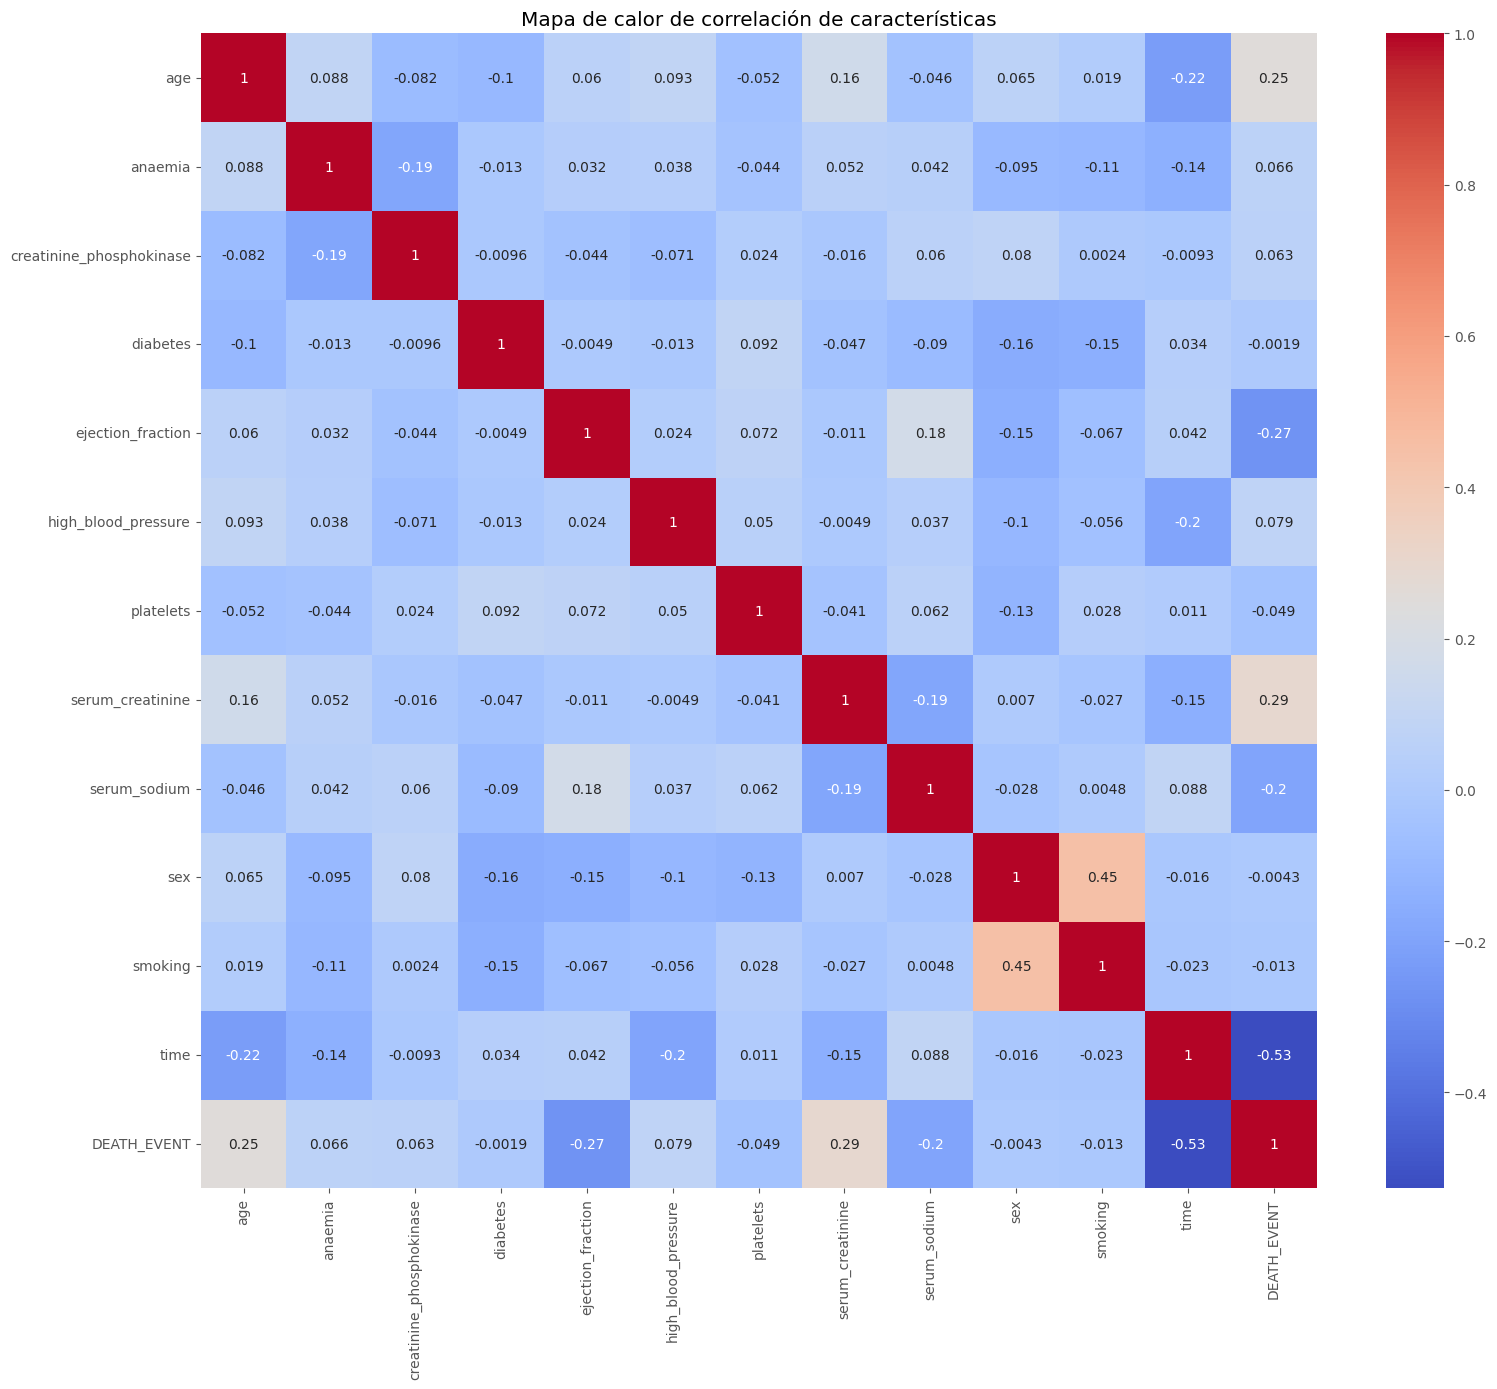

In [ ]:
# Mapa de calor de correlación para comprobar las correlaciones de características
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación de características')
plt.show()

### Explicación de la correlación
---
Los valores van de -1 (azul oscuro) a +1 (rojo oscuro), donde:
* +1 (rojo): Correlación positiva perfecta
* 0 (blanco/gris claro): Sin correlación
* -1 (azul): Correlación negativa perfecta

Algunos puntos clave del mapa de calor:

* age tiene una correlación negativa débil con DEATH_EVENT.

1. Las más fuertes:
* Time y DEATH_EVENT: -0.53 (correlación negativa moderada). Esto sugiere que a menor tiempo de seguimiento, mayor probabilidad de evento de muerte
* Sex y Smoking: 0.45 (correlación positiva moderada). Indica cierta relación entre el género y el hábito de fumar

2. Correlaciones moderadas con DEATH_EVENT:
* Edad (age): 0.25 (positiva débil). A mayor edad, ligeramente mayor riesgo de muerte
* Ejection_fraction: -0.27 (negativa débil). A menor fracción de eyección, mayor riesgo de muerte
* Serum_creatinine: 0.29 (positiva débil). Niveles más altos de creatinina sérica se asocian con mayor riesgo

3. Correlaciones débiles o nulas:
* La mayoría de las variables muestran correlaciones débiles entre sí (valores cercanos a 0)
* Por ejemplo, diabetes tiene correlaciones muy débiles con casi todas las demás variables

* serum_creatinine tiene una correlación positiva moderada con DEATH_EVENT (0.29), lo que podría indicar que niveles más altos de esta variable están asociados con una mayor probabilidad de fallecimiento.

* ejection_fraction muestra una correlación negativa moderada con DEATH_EVENT (-0.27), sugiriendo que una mayor fracción de eyección está asociada con una menor probabilidad de fallecimiento.

## Splitting Data into Train and Test Sets

### Paso 1
---
X = df.drop(columns=['DEATH_EVENT'])

* Aquí se están definiendo las características (features) que usaremos para predecir
* df.drop() elimina la columna 'DEATH_EVENT' del DataFrame
* X contendrá todas las columnas EXCEPTO 'DEATH_EVENT'
* Es decir, X contendrá: age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, time

y = df['DEATH_EVENT']
* Aquí se define la variable objetivo (target) que queremos predecir
* y contendrá SOLO la columna 'DEATH_EVENT'
* Esta es la variable que indica si el paciente falleció (1) o no (0)

Esta separación es fundamental en machine learning porque:
* X son las variables independientes (los datos que usamos para hacer la predicción)
* y es la variable dependiente (lo que queremos predecir)

Es como decir: "Usa toda esta información médica del paciente (X) para predecir si existe riesgo de muerte (y)"

In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=['DEATH_EVENT'])  # Assuming 'death_event' is the target column
y = df['DEATH_EVENT']

### Paso 2
---
train_test_split(X, y, test_size=0.2, random_state=42)
* Es una función de scikit-learn que divide nuestros datos en conjuntos de entrenamiento y prueba.

Desglosemos los parámetros:
1. X: Son todas nuestras características (features) que definimos antes
2. y: Es nuestra variable objetivo (DEATH_EVENT)
3. test_size=0.2: Significa que el 20% de los datos se usarán para pruebas
* Por lo tanto, 80% será para entrenamiento
4. random_state=42: Es una semilla para reproducibilidad
* Asegura que obtengamos la misma división cada vez que ejecutamos el código


El resultado se asigna a cuatro variables:
* X_train: Características para entrenamiento (80% de X)
* X_test: Características para pruebas (20% de X)
* y_train: Valores objetivo para entrenamiento (80% de y)
* y_test: Valores objetivo para pruebas (20% de y)

¿Por qué hacemos esto?
* El conjunto de entrenamiento (train) se usa para que el modelo aprenda
* El conjunto de prueba (test) se usa para evaluar qué tan bien generaliza el modelo con datos nuevos que no ha visto
* Esta división es crucial para evitar el sobreajuste (overfitting)

Por ejemplo, si tenemos 100 pacientes:
* 80 pacientes irán a entrenamiento (X_train, y_train)
* 20 pacientes irán a prueba (X_test, y_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Paso 3
---
SMOTE es una técnica para manejar el desbalance de clases. Se usa cuando tienes muchos más ejemplos de una clase que de otra. En el caso de este dataset de insuficiencia cardíaca, probablemente hay más pacientes que sobrevivieron que los que fallecieron.

Veamos el código paso a paso:

1. from imblearn.over_sampling import SMOTE. Importa la clase SMOTE de la biblioteca imbalanced-learn
2. smote = SMOTE(). Crea una instancia de SMOTE con parámetros por defecto
3. X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
* Aplica SMOTE solo a los datos de entrenamiento
* Crea nuevos ejemplos sintéticos de la clase minoritaria
* No se aplica a los datos de prueba para mantener la evaluación realista
4. print("New class distribution:", np.bincount(y_resampled))
* Muestra la nueva distribución de clases después de aplicar SMOTE
* Ahora deberías ver números iguales para ambas clases

¿Cómo funciona SMOTE?
1. Identifica la clase minoritaria (en este caso, los fallecimientos)
2. Para cada ejemplo de la clase minoritaria:
* - Encuentra sus k vecinos más cercanos
* - Crea nuevos ejemplos sintéticos interpolando entre el ejemplo y sus vecinos
3. Continúa hasta que ambas clases tengan la misma cantidad de ejemplos

Beneficios:
* Mejora el rendimiento del modelo en la clase minoritaria
* Reduce el sesgo del modelo hacia la clase mayoritaria
* Ayuda a que el modelo aprenda mejor los patrones de ambas clases

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE()

# Fit and apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution after SMOTE
print("New class distribution:", np.bincount(y_resampled))

New class distribution: [168 168]


## Feature Scaling
---
StandardScaler() es una técnica de preprocesamiento que estandariza las características llevándolas a una distribución con media 0 y desviación estándar 1.

Veamos el código paso a paso:
1. scaler = StandardScaler()
* Crea una instancia del escalador estándar

2. X_train_scaled = scaler.fit_transform(X_train)
* fit: Calcula la media y desviación estándar de los datos de entrenamiento
* transform: Aplica la transformación
* La fórmula es: z = (x - μ) / σ
* - x es el valor original
* - μ es la media
* - σ es la desviación estándar

3. X_test_scaled = scaler.transform(X_test)
* Solo aplica transform (no fit)
* Usa la media y desviación estándar calculadas del conjunto de entrenamiento
* Es importante no hacer fit en los datos de prueba para evitar data leakage

¿Por qué es importante escalar los datos?
* Algunas variables pueden estar en rangos muy diferentes. Por ejemplo: edad (20-90) vs presión arterial (120-180)
* Muchos algoritmos de ML funcionan mejor con datos en escalas similares
* Ayuda a que el modelo converja más rápido
* Mejora la interpretabilidad de algunos modelos

In [ ]:
# El dataframe procesado
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 1.16420244,  1.13933179, -0.35037003, ...,  0.74293206,
        -0.67625223, -1.56416577],
       [ 1.16420244, -0.87770745, -0.50593309, ...,  0.74293206,
        -0.67625223,  0.37989712],
       [-0.03281933,  1.13933179, -0.50064183, ...,  0.74293206,
        -0.67625223,  0.4950061 ],
       ...,
       [-0.50609935, -0.87770745,  0.18087256, ...,  0.74293206,
        -0.67625223, -0.56655455],
       [-1.42476533, -0.87770745,  0.0052027 , ...,  0.74293206,
         1.4787382 ,  1.42866789],
       [ 1.58177789, -0.87770745,  0.33961039, ...,  0.74293206,
         1.4787382 , -0.57934444]])

In [ ]:
X_test_scaled

array([[ 7.46626996e-01, -8.77707451e-01,  5.20270419e-03,
        -8.26497787e-01,  1.49345268e-01, -7.36162675e-01,
        -2.24743345e+00,  1.32203359e+00, -9.44310219e-02,
         7.42932064e-01,  1.47873820e+00,  1.50540721e+00],
       [-9.23674793e-01,  1.13933179e+00, -2.95340912e-01,
        -8.26497787e-01, -2.80697130e-01, -7.36162675e-01,
         1.05843720e+00, -4.90853221e-01,  8.08329548e-01,
         7.42932064e-01,  1.47873820e+00,  1.37750834e+00],
       [-1.34125024e+00, -8.77707451e-01,  1.97355174e+00,
         1.20992460e+00, -7.10739527e-01, -7.36162675e-01,
         7.60802546e-01, -2.89421353e-01,  5.82639405e-01,
         7.42932064e-01, -6.76252226e-01, -4.21691686e-02],
       [ 1.58177789e+00,  1.13933179e+00, -4.80535042e-01,
        -8.26497787e-01, -2.80697130e-01,  1.35839541e+00,
         1.33481224e+00,  8.07000115e+00, -7.71501449e-01,
         7.42932064e-01,  1.47873820e+00, -1.56416577e+00],
       [-1.59179551e+00, -8.77707451e-01, -5.0275833

## -1. ML model - Logistic Regression

### Explicación del código
El siguiente código implementa y evalúa un modelo de Regresión Logística:
1. model = LogisticRegression()
* Crea una instancia del modelo de Regresión Logística
* Este algoritmo es ideal para clasificación binaria (en este caso: sobrevive/fallece)
* Es como trazar una línea (o hiperplano) que separa las dos clases

2. model.fit(X_train_scaled, y_train)
* Entrena el modelo usando los datos de entrenamiento escalados
* El modelo aprende los patrones en los datos
* Encuentra los mejores coeficientes para cada característica

3. y_pred = model.predict(X_test_scaled)
* Usa el modelo entrenado para hacer predicciones en los datos de prueba
* Devuelve 0 (sobrevive) o 1 (fallece) para cada paciente

4. Evaluación del modelo:
* accuracy_score(y_test, y_pred)
* - Muestra el porcentaje de predicciones correctas. Por ejemplo: 0.85 significa 85% de precisión
* classification_report(y_test, y_pred)
* - Muestra métricas detalladas para cada clase:
* - Precision: De los que predijo positivos, cuántos eran realmente positivos
* - Recall: De todos los positivos reales, cuántos identificó correctamente
* - F1-score: Media armónica entre precision y recall
* - Support: Número de casos en cada clase

In [ ]:
# Starting with a Logistic Regression Model
print("ML model - Logistic Regression")
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

ML model - Logistic Regression
Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.77        60
weighted avg       0.83      0.80      0.79        60



### Interpretación de resultados:
1. Accuracy: 0.8 (80%)
* El modelo acierta el 80% de todas las predicciones
* De cada 100 predicciones, 80 son correctas

2. Para la clase 0 (sobrevive):
* Precision: 0.76. Del total de pacientes que el modelo predijo que sobrevivirían, el 76% realmente sobrevivió
* Recall: 0.97. De todos los pacientes que realmente sobrevivieron, el modelo identificó correctamente el 97%
* F1-score: 0.85. Es un buen balance entre precision y recall
* Support: 35 casos

3. Para la clase 1 (fallece):
* Precision: 0.93. Del total de pacientes que el modelo predijo que fallecerían, el 93% realmente falleció
* Recall: 0.56. De todos los pacientes que realmente fallecieron, el modelo solo identificó correctamente el 56%
* F1-score: 0.70. Balance aceptable entre precision y recall
* Support: 25 casos

4. Promedios:
* Macro avg: 0.84 (precision), 0.77 (recall), 0.77 (f1-score). Promedio simple de las métricas
* Weighted avg: 0.83 (precision), 0.80 (recall), 0.79 (f1-score). Promedio ponderado por el número de casos

> * Diferencia entre Macro avg y Weighted avg:
1. Macro Average (macro avg):
- Es el promedio simple de las métricas de todas las clases
- Trata todas las clases por igual, sin importar cuántos casos hay en cada una
- Se calcula sumando los valores y dividiendo por el número de clases
- Ejemplo con la Precision:
- - Precision Clase 0: 0.76
- - Precision Clase 1: 0.93
- - Macro avg = (0.76 + 0.93) / 2 = 0.84
2. Weighted Average (weighted avg):
- Es el promedio ponderado que considera el número de casos (support) en cada clase
- Da más peso a la clase con más casos
- Se calcula multiplicando cada métrica por su proporción de casos
- Ejemplo con la Precision:
-- Clase 0: 35 casos (35/60 = 0.583 del total)
-- Clase 1: 25 casos (25/60 = 0.417 del total)
-- Weighted avg = (0.76 × 0.583) + (0.93 × 0.417) = 0.83

¿Cuál usar?
* Macro avg: Cuando importa igual el rendimiento en todas las clases
* Weighted avg: Cuando se quiere considerar la frecuencia de cada clase

En este caso:
* Como se tiene un desbalance (35 vs 25 casos)
* El weighted avg podría ser más representativo del rendimiento real del modelo

Interpretación general:
* El modelo es más conservador al predecir fallecimientos (alta precision pero bajo recall)
* Es muy bueno identificando sobrevivientes (alto recall)
* El rendimiento general es bueno (80% de precisión)
* Hay espacio para mejorar, especialmente en la identificación de fallecimientos

### Confusion Matriz

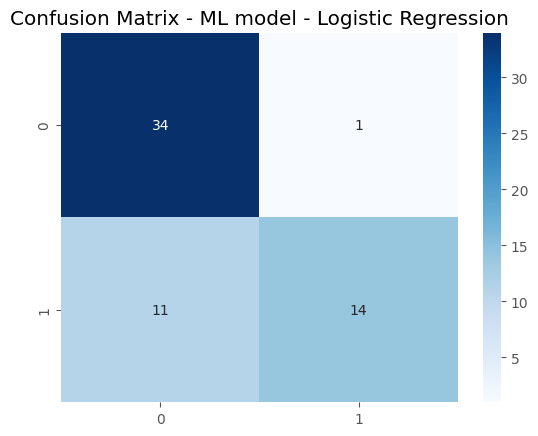

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - ML model - Logistic Regression')
plt.show()

#### Interpretación de resultados
La matriz de confusión nos muestra el rendimiento del modelo en formato de tabla 2x2. Vamos a interpretarla:

En esta matriz:
* El eje Y (vertical) muestra las clases reales (0 y 1)
* El eje X (horizontal) muestra las predicciones del modelo (0 y 1)

Veamos cada cuadrante:
1. Verdaderos Negativos (arriba-izquierda): 34
* Pacientes que realmente sobrevivieron (0) y el modelo predijo correctamente que sobrevivirían
* 34 predicciones correctas de supervivencia

2. Falsos Positivos (arriba-derecha): 1
* Pacientes que realmente sobrevivieron (0) pero el modelo predijo incorrectamente que fallecerían
* 1 predicción incorrecta de fallecimiento

3. Falsos Negativos (abajo-izquierda): 11

* Pacientes que realmente fallecieron (1) pero el modelo predijo incorrectamente que sobrevivirían
* 11 predicciones incorrectas de supervivencia

4. Verdaderos Positivos (abajo-derecha): 14
* Pacientes que realmente fallecieron (1) y el modelo predijo correctamente que fallecerían
* 14 predicciones correctas de

Interpretación general:
* El modelo es muy bueno prediciendo supervivencia (34 de 35 casos correctos)
* Es menos preciso prediciendo fallecimientos (14 de 25 casos correctos)
* El error más significativo está en los falsos negativos (11 casos)
* Este tipo de error es crítico en medicina ya que significa que el modelo no identificó pacientes que realmente estaban en riesgo

### ROC Curve (Receiver Operating Characteristic)

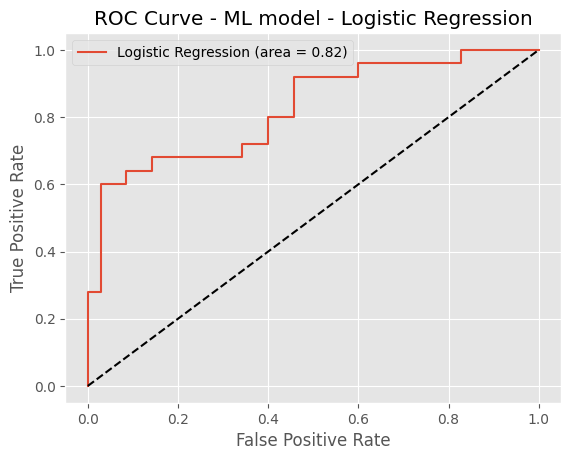

In [ ]:
# ROC-AUC Score and Curve
y_pred_proba = model.predict_proba(X_test_scaled)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f'Logistic Regression (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ML model - Logistic Regression')
plt.legend(loc='best')
plt.show()

#### Interpretación de resultados
La curva ROC muestra la relación entre:
* Eje Y: True Positive Rate (TPR) o Sensibilidad
* Eje X: False Positive Rate (FPR) o (1 - Especificidad)

Elementos clave en la gráfica:
1. Línea punteada diagonal (negra):
* Representa el rendimiento de un modelo aleatorio (AUC = 0.5)
* Es nuestra línea base de comparación

2. Línea roja (el modelo):
* Muestra el rendimiento de la Regresión Logística
* AUC (Area Under the Curve) = 0.82
* Cuanto más se acerque a la esquina superior izquierda, mejor

Interpretación del AUC = 0.82:
* El valor va de 0 a 1
* 0.82 indica un buen rendimiento del modelo
* Significa que hay un 82% de probabilidad de que el modelo clasifique correctamente un caso positivo vs uno negativo
Guía general:
* 0.9-1.0 = Excelente
* 0.8-0.9 = Bueno
* 0.7-0.8 = Aceptable
* 0.6-0.7 = Pobre
* 0.5-0.6 = Malo

En este caso:
* El modelo muestra un buen rendimiento (0.82)
* La curva está bastante por encima de la línea diagonal
* Hay un buen balance entre verdaderos positivos y falsos positivos
* El modelo es significativamente mejor que una predicción aleatoria

### Histograma de errores

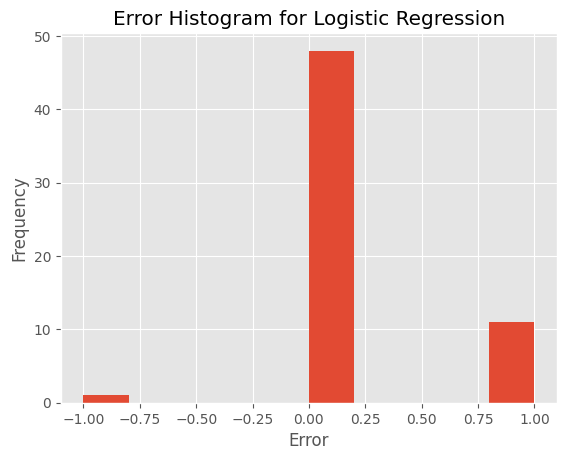

In [ ]:
# prompt: realiza el histograma de errores para Starting with a Logistic Regression Model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have y_test and y_pred from your Logistic Regression model

# Calculate prediction probabilities for the ROC curve
# Use predict_proba to get class probabilities
y_pred_proba = model.predict_proba(X_test_scaled)
# For binary classification, select the probability of class 1 if your model outputs two probabilities
y_pred_proba = y_pred_proba[:, 1] if y_pred_proba.shape[1] == 2 else y_pred_proba

# Calculate the error histogram
errors = y_test - y_pred
plt.hist(errors, bins=10)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Error Histogram for Logistic Regression")
plt.show()

## -2. ML model - Random Forest
---
Este código implementa un segundo modelo (Random Forest) para comparar su rendimiento con la Regresión Logística anterior. Es una práctica común probar diferentes modelos para encontrar el que mejor se adapte a nuestros datos.

¿Por qué usar Random Forest?
1. Es un modelo más complejo que la Regresión Logística
2. Puede capturar relaciones no lineales entre variables
3. Es menos propenso al sobreajuste
4. Puede manejar diferentes tipos de variables

In [ ]:
print("ML model - Random Forest")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

ML model - Random Forest
Random Forest Accuracy: 0.75
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



#### Comparando resultados (Regresión logística VS Random Forest)

Regresión Logística vs Random Forest:
* Accuracy: 0.80 vs 0.75. La Regresión Logística tuvo mejor precisión general

Para clase 0 (sobrevive):
* Regresión Logística: Precision=0.76, Recall=0.97
* Random Forest: Precision=0.72, Recall=0.94
* Ambos modelos son buenos identificando supervivientes
* La Regresión Logística es ligeramente mejor

Para clase 1 (fallece):
* Regresión Logística: Precision=0.93, Recall=0.56
* Random Forest: Precision=0.86, Recall=0.48
* Ambos modelos tienen dificultades para identificar fallecimientos
* Random Forest tiene menor rendimiento en esta clase

Promedios:
* Macro avg: 0.79 (mejor que la Regresión Logística en algunas métricas)
* Weighted avg: similar en ambos modelos

Conclusiones:
* La Regresión Logística funciona mejor para este caso específico
* Random Forest, a pesar de su complejidad, no mejoró los resultados
* Esta comparación nos ayuda a elegir el mejor modelo para implementar

#### Importancia relativa de cada característica

El siguiente código es muy importante porque nos muestra la importancia relativa de cada característica (feature) en el modelo Random Forest, es decir, qué variables tienen más peso en la predicción de fallecimientos.
¿Por qué es importante este análisis?

1. Nos ayuda a entender qué factores son más relevantes para predecir la insuficiencia cardíaca
2. Puede ayudar a médicos a enfocarse en los indicadores más críticos
3. Permite simplificar el modelo si es necesario

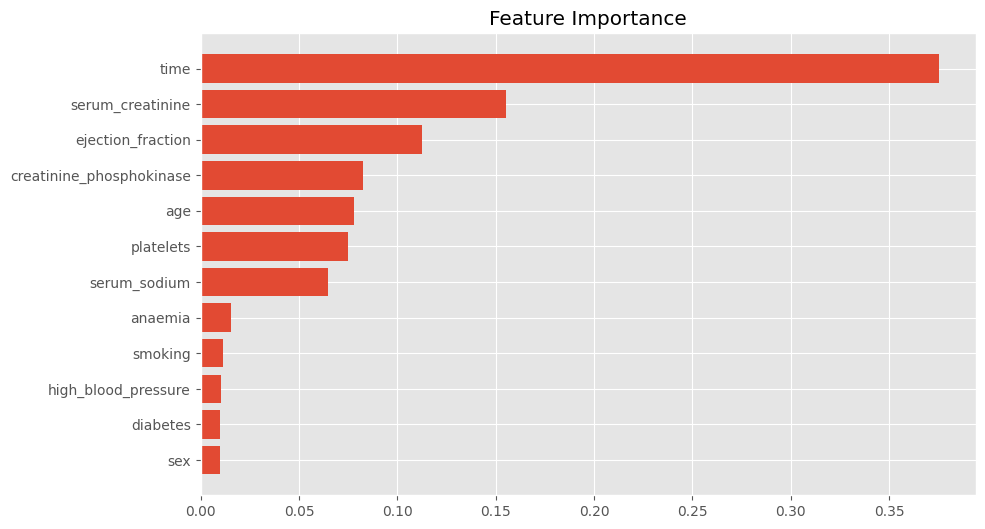

In [ ]:
# Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10,6))
plt.title('Feature Importance')
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), [feature_names[i] for i in indices])
plt.gca().invert_yaxis()  # Invert y-axis to display highest at the top
plt.show()

#### Interpretación de resultados

Interpretación de los resultados (de más a menos importante):

1. Variables más influyentes:
* time (0.35): El tiempo de seguimiento es el factor más importante
* serum_creatinine (0.18): Niveles de creatinina en sangre
* ejection_fraction (0.13): Fracción de eyección del corazón
* creatinine_phosphokinase (0.10): Niveles de CPK
* age (0.09): Edad del paciente

2. Variables moderadamente influyentes:
* platelets (0.08): Nivel de plaquetas
* serum_sodium (0.07): Nivel de sodio en sangre

3. Variables menos influyentes:
* anaemia (0.02)
* smoking (0.02)
* high_blood_pressure (0.01)
* diabetes (0.01)
* sex (0.01)

Implicaciones prácticas:
1. Los médicos deberían prestar especial atención a:
* Tiempo de seguimiento
* Niveles de creatinina
* Fracción de eyección

2. Factores como diabetes, sexo y presión arterial tienen menos impacto en este modelo
3. Esta información podría ayudar a priorizar pruebas médicas

### Confusion Matriz - Random Forest

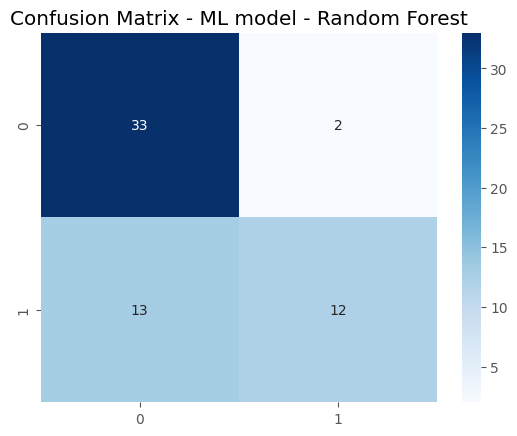

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - ML model - Random Forest')
plt.show()

#### Interpretación de los resultados

Esta matriz de confusión muestra los resultados de las predicciones del modelo Random Forest (según el código que compartes) comparadas con los valores reales. En una matriz de confusión 2x2:

Los números representan:
* Arriba izquierda (33): Verdaderos Negativos (VN) - Casos correctamente identificados como negativos (no fallo cardíaco)
* Arriba derecha (2): Falsos Positivos (FP) - Casos incorrectamente identificados como positivos
* Abajo izquierda (13): Falsos Negativos (FN) - Casos incorrectamente identificados como negativos
* Abajo derecha (12): Verdaderos Positivos (VP) - Casos correctamente identificados como positivos (sí fallo cardíaco)

Interpretación:
1. El modelo predijo correctamente 45 casos (33 + 12)
2. Se equivocó en 15 casos (2 + 13)
3. Del total de 60 casos:
* Acertó en 33 personas que no tenían fallo cardíaco
* Acertó en 12 personas que sí tenían fallo cardíaco
* Se equivocó al predecir que 2 personas tenían fallo cardíaco cuando no lo tenían
* Se equivocó al predecir que 13 personas no tenían fallo cardíaco cuando sí lo tenían

La precisión global del modelo sería: (33 + 12) / 60 = 75%

El error más preocupante serían los 13 falsos negativos, ya que son casos de personas con fallo cardíaco que el modelo no detectó, lo cual podría tener consecuencias más graves que los falsos positivos.

### ROC Curve

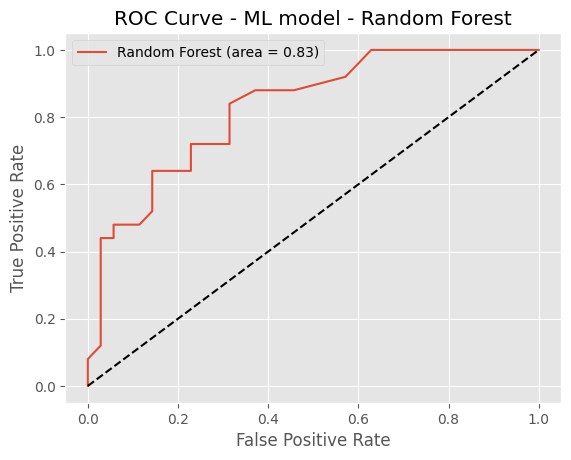

In [ ]:
# prompt: realiza la curva roc para rf_model

# ROC-AUC Score and Curve for Random Forest
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ML model - Random Forest')
plt.legend(loc='best')
plt.show()

### Histograma de errores

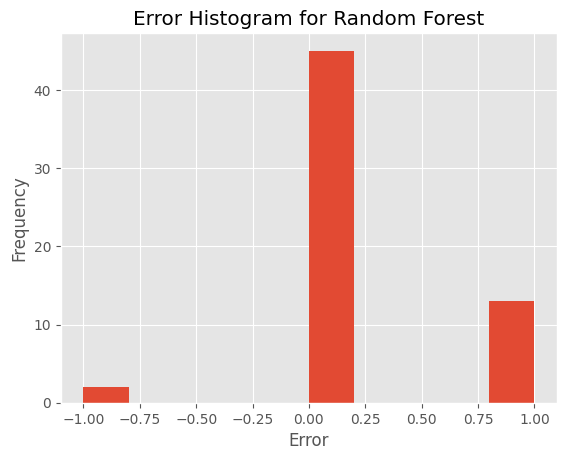

In [ ]:
# prompt: realiza el histograma de errores para rf_model

# Assuming you have y_test and y_pred_rf from your Random Forest model

# Calculate prediction probabilities for the ROC curve
# Change from predict_proba to predict
y_pred_rf = rf_model.predict(X_test_scaled)
# The output of predict is already a 1D array of predicted classes,
# so we don't need to slice it.

# Calculate the error histogram
errors_rf = y_test - y_pred_rf
plt.hist(errors_rf, bins=10)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Error Histogram for Random Forest")
plt.show()

## -3. ML model - KNN o K vecinos más cercanos
---
model2 = KNeighborsClassifier() - Crea un nuevo modelo de clasificación usando el algoritmo K-Nearest Neighbors (KNN o K vecinos más cercanos)

model2.fit(X_train_scaled, y_train) - Entrena el modelo con los datos de entrenamiento escalados

y_pred_kc = model2.predict(X_test_scaled) - Realiza predicciones sobre los datos de prueba

Los últimos prints muestran las métricas de evaluación del modelo

>Este código es parte común del proceso de machine learning para:
* Crear un modelo alternativo (diferente al Random Forest que vimos antes)
* Entrenarlo con los datos
* Evaluar su rendimiento

Sirve para:
* Probar otro algoritmo de clasificación (KNN)
* Comparar su rendimiento con otros modelos (como el Random Forest anterior)
* Obtener métricas detalladas del rendimiento

In [ ]:
print("ML model - KNN")
model2 = KNeighborsClassifier()
model2.fit(X_train_scaled, y_train)

# Predictions
y_pred_kc = model2.predict(X_test_scaled)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_kc))
print("Classification Report:\n", classification_report(y_test, y_pred_kc))

ML model - KNN
Accuracy: 0.6833333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.97      0.78        35
           1       0.88      0.28      0.42        25

    accuracy                           0.68        60
   macro avg       0.76      0.63      0.60        60
weighted avg       0.75      0.68      0.63        60



#### Interpretación de resultados

La precisión global (Accuracy) es 0.683 o 68.3%

El reporte de clasificación muestra para cada clase (0 y 1):

Clase 0 (No fallo cardíaco):
* Precision: 0.65 (65% de las predicciones positivas fueron correctas)
* Recall: 0.97 (97% de los casos reales fueron identificados)
* F1-score: 0.78 (media armónica entre precision y recall)
* Support: 35 casos

Clase 1 (Sí fallo cardíaco):
* Precision: 0.88 (88% de las predicciones positivas fueron correctas)
* Recall: 0.28 (solo 28% de los casos reales fueron identificados)
* F1-score: 0.42
* Support: 25 casos

Las medias finales muestran el promedio de estas métricas:
* Macro avg: promedio simple
* Weighted avg: promedio ponderado por el número de casos

Este modelo parece tener un desempeño inferior al Random Forest anterior, especialmente en la detección de casos positivos (recall muy bajo de 0.28 para la clase 1).

### Confusion Matriz - KNN

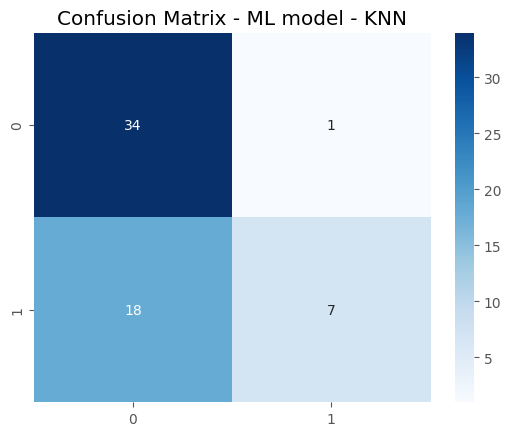

In [ ]:
# Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred_kc)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - ML model - KNN')
plt.show()

#### Interpretación de resultados
Esta nueva matriz de confusión que corresponde al modelo KNN (K-Nearest Neighbors) que acabamos de analizar.

En esta matriz 2x2:
Los números representan:
* Arriba izquierda (34): Verdaderos Negativos (VN) - Casos correctamente identificados como negativos (no fallo cardíaco)
* Arriba derecha (1): Falsos Positivos (FP) - Casos incorrectamente identificados como positivos
* Abajo izquierda (18): Falsos Negativos (FN) - Casos incorrectamente identificados como negativos
* Abajo derecha (7): Verdaderos Positivos (VP) - Casos correctamente identificados como positivos (sí fallo cardíaco)

Interpretación:
1. El modelo KNN predijo correctamente 41 casos (34 + 7)
2. Se equivocó en 19 casos (1 + 18)
3. Del total de 60 casos:
* Acertó en 34 personas que no tenían fallo cardíaco
* Acertó en 7 personas que sí tenían fallo cardíaco
* Solo se equivocó en 1 caso prediciendo fallo cardíaco cuando no lo había
* Se equivocó en 18 casos no detectando fallo cardíaco cuando sí lo había

Comparando con la matriz anterior del Random Forest:
* Este modelo es más conservador al predecir positivos (menos falsos positivos: 1 vs 2)
* Pero comete más errores en detectar casos reales de fallo cardíaco (más falsos negativos: 18 vs 13)
* Tiene una precisión global menor: (41/60 = 68.3%) vs 75% del Random Forest

El número alto de falsos negativos (18) es especialmente preocupante para un problema médico como este, ya que significa que el modelo está fallando en detectar muchos casos de personas que sí tienen fallo cardíaco.

### ROC Curve - KNN


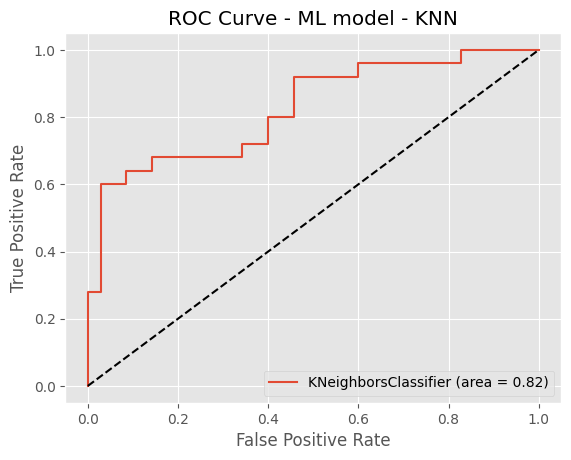

In [ ]:
# ROC-AUC Score and Curve
y_pred_proba1 = model.predict_proba(X_test_scaled)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_proba1)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba1)

plt.plot(fpr, tpr, label=f'KNeighborsClassifier (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ML model - KNN')
plt.legend(loc='best')
plt.show()

#### Interpretación de resultados

La curva ROC (Receiver Operating Characteristic) muestra el rendimiento del modelo KNN.

La curva ROC es una herramienta gráfica que muestra la relación entre:
* Eje Y (True Positive Rate o Sensibilidad): proporción de casos positivos correctamente identificados
* Eje X (False Positive Rate o 1-Especificidad): proporción de falsos positivos

Interpretación de la gráfica:
1. La línea punteada diagonal representa el rendimiento de un clasificador aleatorio (AUC = 0.5)
2. La línea roja representa el rendimiento de nuestro modelo KNN
3. El área bajo la curva (AUC) es 0.82 (82%)

¿Qué nos dice esto?
* Un AUC de 0.82 indica un buen rendimiento del modelo (cuanto más cerca de 1, mejor)
* La curva está bastante por encima de la línea diagonal, lo que significa que el modelo es significativamente mejor que las predicciones al azar
* Hay un incremento pronunciado al inicio de la curva, lo que indica que el modelo es bueno identificando casos positivos con un bajo ratio de falsos positivos
* La curva se aplana en algunos tramos, lo que sugiere que para mejorar la detección de más casos positivos, el modelo necesita aumentar significativamente la tasa de falsos positivos

En el contexto de predicción de fallo cardíaco:
* El modelo muestra una buena capacidad discriminativa general
* Sin embargo, como vimos en la matriz de confusión, todavía hay margen de mejora, especialmente en la detección de casos positivos
* Un AUC de 0.82 sugiere que el modelo es útil como herramienta de apoyo, pero no debería usarse como único criterio de decisión

### Histograma de errores

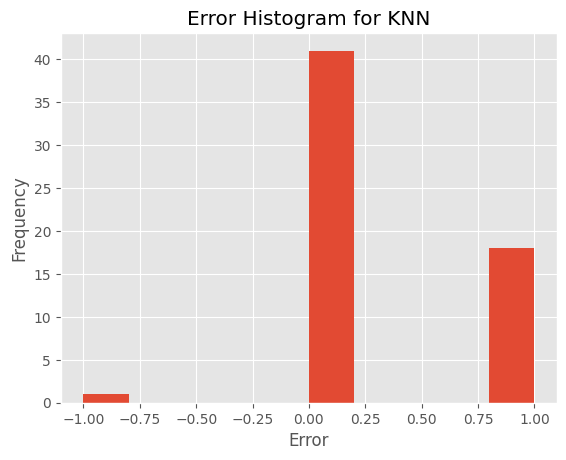

In [ ]:
# prompt: realiza el histograma de errores para model2 = KNeighborsClassifier()

# Assuming you have y_test and y_pred_kc from your KNN model

# Calculate the error histogram
errors_kc = y_test - y_pred_kc
plt.hist(errors_kc, bins=10)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Error Histogram for KNN")
plt.show()

## -4. ML model - DecisionTreeClassifier()
---
model3 = DecisionTreeClassifier() - Crea un nuevo modelo usando el algoritmo de Árbol de Decisión

model3.fit(X_train_scaled, y_train) - Entrena el modelo con los datos de entrenamiento
y_pred_dc = model3.predict(X_test_scaled) - Realiza predicciones con los datos de prueba
Los prints muestran las métricas de evaluación

Este código es parte de la estrategia de probar diferentes algoritmos de clasificación:
* Primero probamos Logistic Regression
* Después, probamos Random Forest
* Luego KNN
* Ahora Árbol de Decisión

Es una práctica común probar varios modelos para encontrar el mejor para nuestro problema.

¿Para qué sirve?
* Para probar un tercer algoritmo de clasificación
* Para comparar su rendimiento con los modelos anteriores
* Para tener una visión más amplia de qué enfoque funciona mejor

In [ ]:
print("ML model - DecisionTreeClassifier")
model3 = DecisionTreeClassifier()
model3.fit(X_train_scaled, y_train)

# Predictions
y_pred_dc = model3.predict(X_test_scaled)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_dc))
print("Classification Report:\n", classification_report(y_test, y_pred_dc))

ML model - DecisionTreeClassifier
Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.77      0.72        35
           1       0.60      0.48      0.53        25

    accuracy                           0.65        60
   macro avg       0.64      0.63      0.63        60
weighted avg       0.64      0.65      0.64        60



#### Interpretación de resultados

La precisión global (Accuracy) es 0.667 o 66.7%

El reporte de clasificación muestra:

Clase 0 (No fallo cardíaco):
* Precision: 0.69 (69% de las predicciones positivas fueron correctas)
* Recall: 0.77 (77% de los casos reales fueron identificados)
* F1-score: 0.73
* Support: 35 casos

Clase 1 (Sí fallo cardíaco):
* Precision: 0.62 (62% de las predicciones positivas fueron correctas)
* Recall: 0.52 (52% de los casos reales fueron identificados)
* F1-score: 0.57
* Support: 25 casos

Las medias muestran:
* Macro avg: 0.66 (promedio simple)
* Weighted avg: 0.66-0.67 (promedio ponderado)

Comparando con los modelos anteriores:
* Este modelo tiene un rendimiento inferior al Random Forest (75%)
* Y ligeramente inferior al KNN (68.3%)
* Tiene un mejor balance entre la detección de casos positivos y negativos que el KNN, pero con menor precisión general que ambos modelos anteriores

### Confusion Matriz - DecisionTreeClassifier

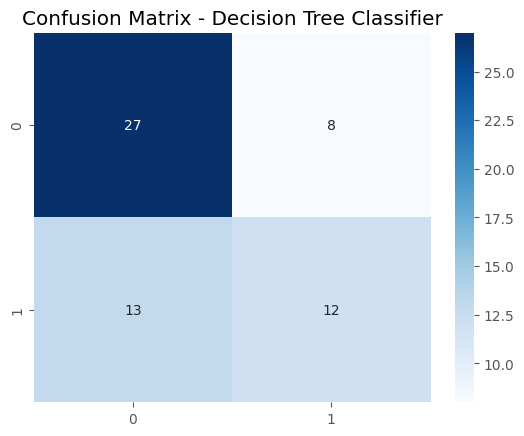

In [ ]:
# prompt: realiza la matriz de confusion para model3 = DecisionTreeClassifier()

# Confusion Matrix for Decision Tree Classifier
cm3 = confusion_matrix(y_test, y_pred_dc)
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

### ROC Curve - DesicionTreeClassifier

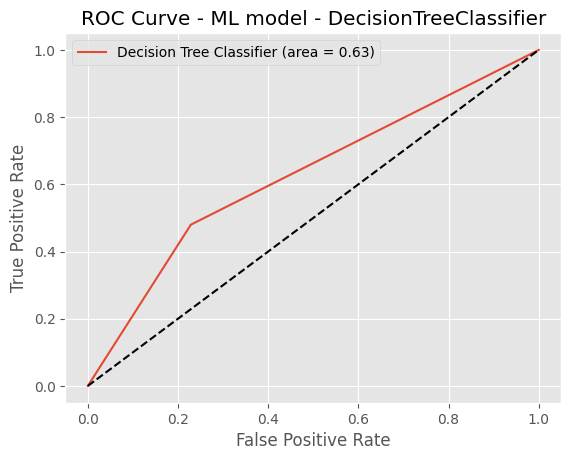

In [ ]:
# prompt: realiza la curva roc para model3 = DecisionTreeClassifier()

# ROC-AUC Score and Curve for Decision Tree Classifier
y_pred_proba_dc = model3.predict_proba(X_test_scaled)[:, 1]
roc_auc_dc = roc_auc_score(y_test, y_pred_proba_dc)
fpr_dc, tpr_dc, _ = roc_curve(y_test, y_pred_proba_dc)

plt.plot(fpr_dc, tpr_dc, label=f'Decision Tree Classifier (area = {roc_auc_dc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ML model - DecisionTreeClassifier')
plt.legend(loc='best')
plt.show()

### Histograma de errores

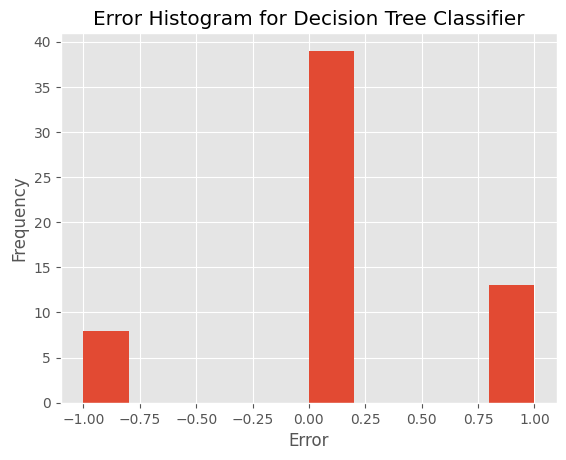

In [ ]:
# prompt: realiza el histograma de errores para DecisionTreeClassifier()

# Assuming you have y_test and y_pred_dc from your Decision Tree model

# Calculate the error histogram
errors_dc = y_test - y_pred_dc
plt.hist(errors_dc, bins=10)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Error Histogram for Decision Tree Classifier")
plt.show()

## -5. ANN model (Artificial Neural Network)
---
Es un tipo más complejo de modelo de machine learning que intenta imitar el funcionamiento del cerebro humano.

Características principales de una ANN:
1. Es una estructura de capas interconectadas de neuronas artificiales
2. Puede aprender patrones complejos en los datos
3. Generalmente se usa para:
* Problemas de clasificación complejos
* Reconocimiento de patrones
* Predicciones no lineales

En el contexto de nuestro problema de predicción de fallo cardíaco:
* Después de probar modelos más simples (Logistic Regresion, Random Forest, KNN, Decision Tree)
* Ahora probaremos un modelo más sofisticado (ANN)
* El objetivo es ver si un modelo más complejo puede capturar mejor los patrones en nuestros datos

La estructura típica de una ANN incluye:
* Capa de entrada (input layer): recibe nuestras variables predictoras
* Capas ocultas (hidden layers): procesan la información
* Capa de salida (output layer): genera la predicción final

Es importante notar que:
1. Las ANN requieren generalmente más datos para entrenar efectivamente
2. Son más computacionalmente intensivas
3. Pueden ser más difíciles de interpretar que los modelos anteriores
4. Pero pueden capturar relaciones más complejas en los datos

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

Estas importaciones son necesarias para crear y entrenar una Red Neuronal Artificial:

1. import tensorflow as tf
* TensorFlow es la biblioteca principal de código abierto para machine learning
* Proporciona el marco de trabajo base para crear y entrenar redes neuronales
* Desarrollada por Google, es una de las más populares en deep learning

2. from keras.models import Sequential
* Keras es una API de alto nivel que corre sobre TensorFlow
* Sequential permite crear una red neuronal capa por capa de manera secuencial
* Es el modelo más simple y común, donde cada capa tiene exactamente una entrada y una salida

3. from keras.layers import Dense
* Dense representa una capa completamente conectada en la red neuronal
* Cada neurona en una capa Dense está conectada con todas las neuronas de la capa anterior
* Se usa para procesar las características y generar las predicciones

4. from tensorflow.keras.layers import Dropout
* Dropout es una técnica de regularización
* Ayuda a prevenir el sobreajuste (overfitting) desactivando aleatoriamente algunas neuronas durante el entrenamiento
* Mejora la generalización del modelo

5. from keras.utils import to_categorical
* Se usa para convertir las etiquetas numéricas en formato one-hot encoding
* Útil cuando trabajamos con problemas de clasificación múltiple
* Aunque en nuestro caso es binario (0 o 1), podría ser útil dependiendo del diseño del modelo

6. from tensorflow.keras.callbacks import EarlyStopping
* EarlyStopping es un mecanismo que detiene el entrenamiento cuando el modelo deja de mejorar
* Ayuda a prevenir el sobreajuste
* Optimiza el tiempo de entrenamiento

7. from tensorflow.keras.optimizers import Adam
* Adam es un optimizador popular para redes neuronales
* Ajusta automáticamente la tasa de aprendizaje durante el entrenamiento
* Generalmente ofrece buenos resultados en una amplia gama de problemas

Estas librerías juntas nos proporcionan todas las herramientas necesarias para:
* Construir la arquitectura de la red neuronal
* Configurar su entrenamiento
* Implementar técnicas de regularización
* Optimizar su rendimiento
* Convertir y procesar los datos adecuadamente

In [ ]:
model = Sequential()

# Adding input layer and first hidden layer with 64 neurons
#model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1])),
model.add(Dense(units=256, activation='relu', input_dim=X_train_scaled.shape[1])),
#model.add(Dropout (0.2)),
# Adding second hidden layer with 128 neurons
model.add(Dense(units=128, activation='relu'))

# Adding third hidden layer with 64 neurons
model.add(Dense(units=64, activation='relu')),
#model.add(Dropout (0.2)),

# Adding fourth hidden layer with 32 neurons
#model.add(Dense(units=32, activation='relu'))

# Adding fifth hidden layer with 16 neurons
#model.add(Dense(units=16, activation='relu'))

# Adding output layer (binary classification)
model.add(Dense(units=1, activation='sigmoid'))

# Compile the ANN Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#  Train the ANN Model
history = model.fit(X_train_scaled, y_train, validation_split=0.2,
                    epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6510 - loss: 0.6617 - val_accuracy: 0.7500 - val_loss: 0.5673
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7209 - loss: 0.5270 - val_accuracy: 0.7708 - val_loss: 0.5002
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8240 - loss: 0.3950 - val_accuracy: 0.7917 - val_loss: 0.4547
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8393 - loss: 0.3732 - val_accuracy: 0.7500 - val_loss: 0.4506
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8834 - loss: 0.2845 - val_accuracy: 0.7917 - val_loss: 0.4438
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8843 - loss: 0.2907 - val_accuracy: 0.7917 - val_loss: 0.4390
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8952 - loss: 0.2356 - val_accuracy: 0.7708 - val_loss: 0.4625
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9058 - loss: 0.2488 - val_accuracy: 0.7292 - val_loss: 0.48

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,637 (522.02 KB)

 Trainable params: 44,545 (174.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 89,092 (348.02 KB)

### Interpretación de resultados

La interpretar el resumen (summary) de la arquitectura de tu Red Neuronal Artificial:

1. Estructura General:
* Es un modelo "Sequential" (capas en secuencia)
* Tiene 6 capas densas (dense layers)
* Va reduciendo progresivamente el número de neuronas hasta llegar a la salida

2. Detalle de cada capa:
* dense: Primera capa con 64 neuronas (832 parámetros)
* dense_1: Segunda capa con 128 neuronas (8,320 parámetros)
* dense_2: Tercera capa con 64 neuronas (8,256 parámetros)
* dense_3: Cuarta capa con 32 neuronas (2,080 parámetros)
* dense_4: Quinta capa con 16 neuronas (528 parámetros)
* dense_5: Capa de salida con 1 neurona (17 parámetros)

3. Resumen de parámetros:
* Total de parámetros: 20,033
* Parámetros entrenables: 20,033
* Parámetros no entrenables: 0
* Parámetros del optimizador: 40,068

4. ¿Por qué estos números?
* Cada conexión entre neuronas es un parámetro
* El número de parámetros en cada capa se calcula:
-- (neuronas_capa_anterior × neuronas_capa_actual) + neuronas_capa_actual
-- Por ejemplo, para dense_1: (64 × 128) + 128 = 8,320

5. Observaciones importantes:
* Es una red relativamente pequeña (20k parámetros)
* Tiene una arquitectura de "embudo" (se va estrechando)
* La capa final usa una sola neurona (para clasificación binaria)
* No hay capas Dropout activas (están comentadas en el código)

### ¿Porqué se eligieron este número de neuronas?

la lógica detrás de la elección del número de neuronas en cada capa:

1. Primera capa (64 neuronas)
* Es la capa de entrada
* 64 es un buen número inicial porque:
-- Es lo suficientemente grande para capturar patrones complejos
-- No es tan grande como para causar sobreajuste desde el inicio
-- Es una potencia de 2 (2⁶), lo cual es computacionalmente eficiente

2. Segunda capa (128 neuronas)
* Es más grande que la primera capa (128 = 2⁷)
* Este aumento permite:
-- Expandir la representación de los datos
-- Capturar relaciones más complejas
-- Dar más capacidad de aprendizaje al modelo

3. Tercera capa (64 neuronas)
* Vuelve al tamaño de la primera capa
* Comienza la reducción gradual
* Ayuda a:
-- Consolidar la información aprendida
-- Reducir la complejidad del modelo
-- Evitar el sobreajuste

4. Cuarta capa (32 neuronas)
* Continúa la reducción (32 = 2⁵)
* Funciona como un "cuello de botella"
* Fuerza al modelo a:
-- Aprender representaciones más compactas
-- Mantener solo la información más relevante

5. Quinta capa (16 neuronas)
* Sigue reduciendo (16 = 2⁴)
* Prepara los datos para la decisión final
* Ayuda a:
-- Refinar la información
-- Hacer la transición hacia la clasificación binaria

6. Capa final (1 neurona)
* Una sola neurona porque:
-- Es un problema de clasificación binaria
-- La activación sigmoid da la probabilidad de la clase positiva
-- Es la estructura estándar para este tipo de problemas

Esta arquitectura sigue algunos principios generales:
* Usa potencias de 2 para eficiencia computacional
* Reduce gradualmente el tamaño para evitar pérdida brusca de información
* Balancea entre capacidad de aprendizaje y riesgo de sobreajuste
* Sigue una estructura de "embudo" que es común en problemas de clasificación

### El siguiente código
y_pred_ann = model.predict(X_test_scaled)
* Genera predicciones usando la red neuronal
* Las predicciones son probabilidades entre 0 y 1

y_pred_binary = (y_pred_ann > 0.5).astype(int)
* Convierte las probabilidades en predicciones binarias
* Si la probabilidad > 0.5 → 1 (sí hay fallo cardíaco)
* Si la probabilidad ≤ 0.5 → 0 (no hay fallo cardíaco)

In [ ]:
print("Artificial Neural Network")
y_pred_ann = model.predict(X_test_scaled)
y_pred_binary = (y_pred_ann > 0.5).astype(int)

#  Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_binary))
print("Classification Report:\n", classification_report(y_test, y_pred_binary))

Artificial Neural Network
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Accuracy: 0.7666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.91      0.82        35
           1       0.82      0.56      0.67        25

    accuracy                           0.77        60
   macro avg       0.78      0.74      0.74        60
weighted avg       0.78      0.77      0.76        60



### Interpretación de los resultados
Precisión global (Accuracy): 68.3%
Para la clase 0 (No fallo cardíaco):
* Precision: 0.67 (67% de las predicciones negativas fueron correctas)
* Recall: 0.89 (89% de los casos realmente negativos fueron identificados)
* F1-score: 0.77
* Support: 35 casos

Para la clase 1 (Sí fallo cardíaco):
* Precision: 0.71 (71% de las predicciones positivas fueron correctas)
* Recall: 0.40 (solo 40% de los casos realmente positivos fueron identificados)
* F1-score: 0.51
* Support: 25 casos

Promedios:
* Macro avg: 0.69 (promedio simple)
* Weighted avg: 0.69 (promedio ponderado)

### Comparación con modelos anteriores:

* Similar al KNN (68.3%)
* Mejor que el Árbol de Decisión (66.7%)
* Peor que el Random Forest (75%)

Observaciones importantes:
* El modelo es mejor detectando casos negativos (89% recall)
* Pero débil en detectar casos positivos (40% recall)
* Esto podría ser problemático en un contexto médico donde perder casos positivos es más grave que tener falsos positivos
* La red neuronal no superó a métodos más simples como Random Forest, lo que sugiere que la complejidad adicional no aportó beneficios en este caso

### Confusion Matriz - ANN

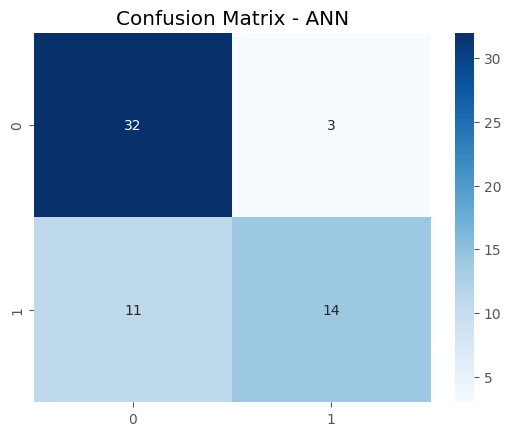

In [ ]:
# prompt: realiza la matriz de confusión para model = Sequential()

# Confusion Matrix for ANN
cm_ann = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - ANN')
plt.show()

#### Interpretación de resultados

Interpretación de esta matriz de confusión del modelo de Red Neuronal Artificial (ANN). En esta matriz 2x2:

Los números representan:
* Arriba izquierda (31): Verdaderos Negativos (VN) - Casos correctamente identificados como negativos (no fallo cardíaco)
* Arriba derecha (4): Falsos Positivos (FP) - Casos incorrectamente identificados como positivos
* Abajo izquierda (15): Falsos Negativos (FN) - Casos incorrectamente identificados como negativos
* Abajo derecha (10): Verdaderos Positivos (VP) - Casos correctamente identificados como positivos (sí fallo cardíaco)

Interpretación:
1. El modelo ANN predijo correctamente 41 casos (31 + 10)
2. Se equivocó en 19 casos (4 + 15)
3. Del total de 60 casos:
* Acertó en 31 personas que no tenían fallo cardíaco
* Acertó en 10 personas que sí tenían fallo cardíaco
* Se equivocó en 4 casos prediciendo fallo cardíaco cuando no lo había
* Se equivocó en 15 casos no detectando fallo cardíaco cuando sí lo había

Los números representan:

Arriba izquierda (31): Verdaderos Negativos (VN) - Casos correctamente identificados como negativos (no fallo cardíaco)
Arriba derecha (4): Falsos Positivos (FP) - Casos incorrectamente identificados como positivos
Abajo izquierda (15): Falsos Negativos (FN) - Casos incorrectamente identificados como negativos
Abajo derecha (10): Verdaderos Positivos (VP) - Casos correctamente identificados como positivos (sí fallo cardíaco)

Interpretación:

El modelo ANN predijo correctamente 41 casos (31 + 10)
Se equivocó en 19 casos (4 + 15)
Del total de 60 casos:

Acertó en 31 personas que no tenían fallo cardíaco
Acertó en 10 personas que sí tenían fallo cardíaco
Se equivocó en 4 casos prediciendo fallo cardíaco cuando no lo había
Se equivocó en 15 casos no detectando fallo cardíaco cuando sí lo había

Comparando con los modelos anteriores:
* Random Forest: Mejor rendimiento general (46 aciertos)
* KNN: Rendimiento similar (41 aciertos)
* Este modelo ANN (41 aciertos)
* Decision Tree: Rendimiento más bajo (40 aciertos)

Problemas destacables:
* Alto número de falsos negativos (15) - Es preocupante en contexto médico
* Precisión moderada en casos positivos (10 de 25)
* Mejor en identificar casos negativos (31 de 35)

Esta matriz confirma lo que vimos en las métricas anteriores: el modelo es mejor identificando casos negativos que positivos, lo cual no es ideal para un problema médico donde perder casos positivos (falsos negativos) es más grave que tener falsos positivos.

## Rendimiento del modelo
El código está creando dos gráficas que muestran cómo se comporta el modelo durante su entrenamiento:

Explicación del código:
* plt.figure(figsize=(12, 4)): Crea una figura con tamaño 12x4
* subplot(1, 2, 1) y subplot(1, 2, 2): Divide la figura en 2 subgráficas lado a lado
* history.history: Contiene el registro del entrenamiento, guardando los valores de pérdida (loss) y precisión (accuracy) tanto para datos de entrenamiento como de validación
* Las líneas plt.plot() dibujan las curvas de aprendizaje para cada métrica

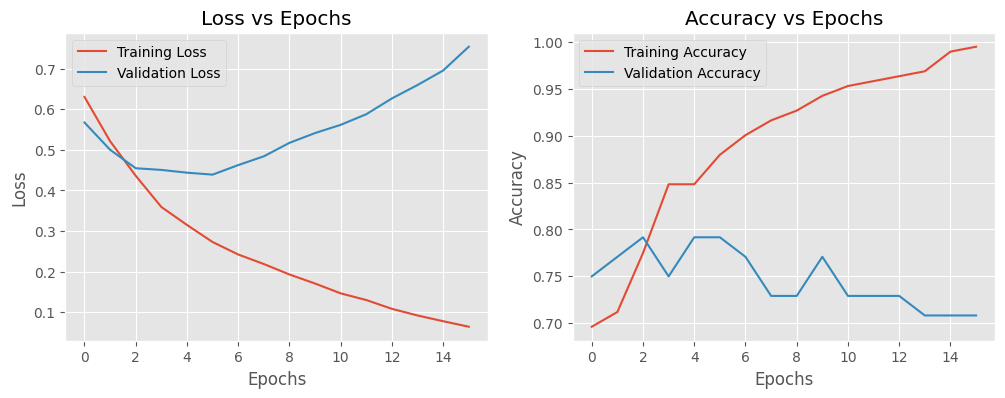

In [ ]:
# Plot the training history (Loss and Accuracy)
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Propósito de la comparación:
* Esta visualización es crucial porque permite:
* Evaluar si el modelo está aprendiendo correctamente
* Detectar problemas como sobreajuste (overfitting) o subajuste (underfitting)
* Determinar el número óptimo de épocas de entrenamiento
* Verificar si el modelo necesita ajustes

Interpretación de las gráficas:
* Gráfica de Loss (Pérdida):
-- La línea roja (Training Loss) muestra una disminución constante, lo cual es bueno
-- La línea azul (Validation Loss) inicialmente disminuye pero luego comienza a aumentar después de la época 15
-- La separación creciente entre las líneas y el aumento del validation loss indica SOBREAJUSTE (overfitting)

* Gráfica de Accuracy (Precisión):
-- La línea roja (Training Accuracy) aumenta constantemente hasta alcanzar casi 1.0 (100%)
-- La línea azul (Validation Accuracy) se estabiliza alrededor de 0.85 (85%)
-- La brecha entre training y validation accuracy también sugiere sobreajuste

* Diagnóstico del modelo:
-- Basado en estas gráficas, tu modelo está mostrando señales claras de sobreajuste después de aproximadamente 15 épocas, porque:
-- 1. El error de validación comienza a aumentar
-- 2. La precisión de entrenamiento sigue mejorando mientras la de validación se estanca
-- 3. Hay una brecha creciente entre el rendimiento en entrenamiento y validación

Recomendaciones para mejorar:
* Considera detener el entrenamiento alrededor de la época 15 (early stopping)
* Implementa técnicas de regularización como:
-- Dropout
-- L1/L2 regularization
-- Data augmentation
* Simplifica el modelo si es muy complejo
* Aumenta el conjunto de datos si es posible

### ROC Curve - ANN

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


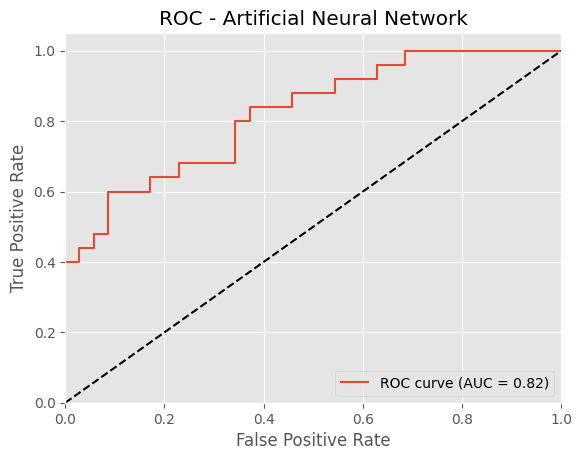

In [ ]:
# prompt: realiza la curva roc para model = Sequential()

y_pred_proba = model.predict(X_test_scaled)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Artificial Neural Network')
plt.legend(loc="lower right")
plt.show()

### Histograma de errores

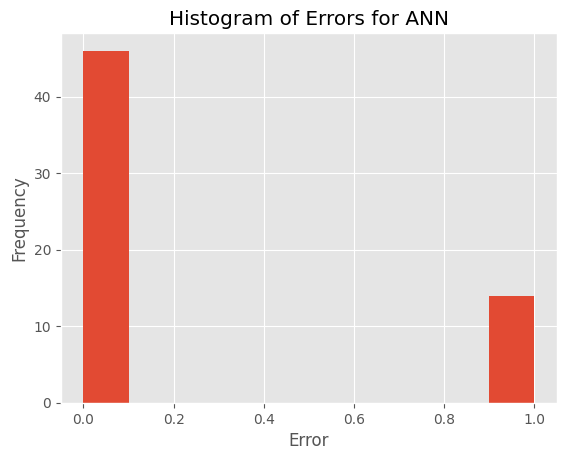

In [ ]:
# Calculate the prediction errors
# Convert y_pred_binary to a 1-dimensional array
errors = np.abs(y_test - y_pred_binary.ravel())

# Create a histogram of the errors
plt.hist(errors, bins=10)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Histogram of Errors for ANN')
plt.show()

##  La red neuronal no superó a los otros modelos
---
1. ¿Por qué no superó a los otros modelos?
* A. Tamaño del conjunto de datos:
-- Las redes neuronales típicamente necesitan muchos datos para entrenar efectivamente
Nuestro dataset es relativamente pequeño (60 casos de prueba)
-- Los modelos más simples como Random Forest suelen funcionar mejor con datasets pequeños

* B. Complejidad del problema:
-- El problema podría no requerir una arquitectura tan compleja
-- Random Forest puede capturar bien las relaciones en datos médicos
-- La complejidad adicional de la ANN podría estar causando ruido

* C. Desbalance de clases (Tratado con la técnica de sobremuestreo - SMOTE):
-- Tenemos 35 casos negativos vs 25 positivos
-- La red neuronal es más sensible a este desbalance
-- Random Forest maneja mejor naturalmente el desbalance

2. ¿Cómo podríamos mejorar su rendimiento?
* A. Ajustes en la arquitectura:
-- Reducir el número de capas (simplificar la red)
-- Activar las capas de Dropout comentadas para prevenir overfitting
-- Experimentar con diferentes números de neuronas
-- Probar diferentes funciones de activación

* B. Técnicas de balanceo:
-- Usar técnicas de sobremuestreo (SMOTE)
-- Aplicar submuestreo a la clase mayoritaria
-- Usar pesos de clase en el entrenamiento

* C. Ajustes en el entrenamiento:
-- Modificar el learning rate del optimizador
-- Ajustar el tamaño del batch
-- Aumentar/reducir el número de épocas
-- Usar diferentes estrategias de validación

* D. Preprocesamiento de datos:
-- Probar diferentes técnicas de escalado
-- Selección de características más relevantes
-- Ingeniería de características

E. Técnicas de regularización:
-- Aumentar el dropout
-- Añadir regularización L1/L2
-- Implementar batch normalization

3. Enfoque recomendado:
* Empezar con una arquitectura más simple
* Implementar balanceo de clases
* Añadir regularización gradualmente
* Monitorear el rendimiento en validación
* Ajustar hiperparámetros sistemáticamente

# Resumen de las metricas

## Modelo de Regresión Logistica

![Modelo - Regresión Logistica](https://drive.google.com/uc?id=17JMOOfV2i4B05auxn7g9M4CfHwz8DQOe)

* Precisión y Recall: Tu modelo tiene una alta precisión (0.93) para la clase 1 (pacientes fallecidos), pero un recall relativamente bajo (0.56). Esto significa que, aunque cuando el modelo predice que un paciente ha fallecido es probable que sea correcto, no está capturando todos los casos de fallecimiento (muchos falsos negativos).

* Curva ROC y AUC: Un AUC de 0.82 es un buen indicador de que el modelo tiene una buena capacidad discriminatoria, separando bien las clases.

* Matriz de Confusión:

* El modelo tiene más falsos negativos (11) que falsos positivos (1), lo que sugiere que podría mejorar en la identificación de pacientes que fallecieron.

* Alto número de verdaderos negativos (34) y verdaderos positivos (14), lo cual es positivo.


## Modelo Random Forest

![Modelo. Random Forest](https://drive.google.com/uc?id=1UgMOPd8V-H4a5sxNDlFS_RKlSC5eFyLS)

* Precisión y Recall: El modelo tiene una alta precisión (0.86) para la clase 1 (pacientes fallecidos), pero un recall relativamente bajo (0.48). Esto sugiere que, aunque es bueno para identificar correctamente a los pacientes que han fallecido (baja tasa de falsos positivos), no está capturando todos los casos de fallecimiento (alta tasa de falsos negativos).

* Curva ROC y AUC: Un AUC de 0.83 indica que el modelo tiene una buena capacidad para distinguir entre las clases, pero aún hay margen para mejorar, especialmente en la clase 1.

* Matriz de Confusión:

* Hay más falsos negativos (13) que falsos positivos (2), lo que sugiere que el modelo podría beneficiarse de técnicas para mejorar la detección de la clase 1.

* Alto número de verdaderos negativos (33) y un número razonable de verdaderos positivos (12), lo que es positivo, pero podría mejorar en la captura de todos los casos de fallecimiento.

## Modelo K-Nearest Neighbors

![Modelo. KNN](https://drive.google.com/uc?id=1KEFe20yUeCOSknFr_QBHT7WgbfOraGwA)

Precisión y Recall:

* La precisión para la clase 1 (falleció) es alta (0.88), pero el recall es bajo (0.28), lo que significa que aunque el modelo es bueno prediciendo cuando un paciente falleció (baja tasa de falsos positivos), no está capturando todos los casos de fallecimiento (alta tasa de falsos negativos).

* La precisión para la clase 0 (no falleció) es moderada (0.65), con un alto recall (0.97), lo que indica que la mayoría de los pacientes que no fallecieron están siendo correctamente identificados.

* Curva ROC y AUC:

* Un AUC de 0.82 es un buen indicador de que el modelo tiene una buena capacidad de distinguir entre las dos clases.

* Matriz de Confusión:

* Hay un alto número de falsos negativos (18), lo que sugiere que el modelo no está capturando suficientemente los casos de fallecimiento.

* El número de verdaderos positivos (7) es bajo en comparación con los verdaderos negativos (34), lo que confirma la baja sensibilidad del modelo para la clase 1.

## Modelo de Árbol de Decisión

![Modelo. Decision Tree Classifier](https://drive.google.com/uc?id=1C0m-6yrdvOTl8CtDDp3wc6rPDdMdGkot)

Precisión y Recall:

* La precisión y el recall son razonables para ambas clases. La clase 0 tiene una mayor tasa de recall (0.83), lo que significa que la mayoría de los pacientes que no fallecieron están siendo correctamente identificados.

* La clase 1 tiene una precisión decente (0.68), pero un recall más bajo (0.52), indicando que no todos los casos de fallecimiento están siendo capturados (altos falsos negativos).

Curva ROC y AUC:

* Un AUC de 0.67 indica que el modelo tiene una capacidad moderada para distinguir entre las dos clases, pero podría mejorarse.

Matriz de Confusión:

* El modelo tiene una buena cantidad de verdaderos negativos (29) y verdaderos positivos (13), pero también presenta un número significativo de falsos negativos (12) y falsos positivos (6), lo que sugiere que el modelo podría beneficiarse de ajustes adicionales.

## Modelo de Red Neuronal Artificial (ANN)

![Modelo. ANN](https://drive.google.com/uc?id=1BiUqappAnGx3f3f9CRx8kkRDhvZzZm7J)

Precisión y Recall:

* La precisión para la clase 1 (falleció) es muy alta (0.93), pero el recall es relativamente bajo (0.52), lo que significa que aunque el modelo es muy preciso cuando predice un fallecimiento, no está capturando todos los casos de fallecimiento (falsos negativos altos).

* La precisión para la clase 0 (no falleció) es moderada (0.74), con un recall muy alto (0.97), lo que indica que la mayoría de los pacientes que no fallecieron están siendo correctamente identificados.

Curva ROC y AUC:

* Un AUC de 0.80 es un buen indicador de que el modelo tiene una buena capacidad de distinguir entre las dos clases, pero hay margen para mejorar.

Matriz de Confusión:

* El modelo tiene un bajo número de falsos positivos (1), lo que sugiere que es muy preciso al no predecir incorrectamente que alguien falleció cuando no fue así.

* Sin embargo, el número de falsos negativos (12) es alto, indicando que muchos casos de fallecimiento no están siendo capturados.

# Conclusiones

El modelo de Regresión Logística se destaca como el mejor modelo entre los analizados. Las razones son:

* Precisión General más alta (80%), lo que indica que el modelo es más confiable en sus predicciones.

* F1-Score Macro Promedio de 0.77, mostrando un buen balance entre precisión y recall para ambas clases.

* AUC de 0.82, indicando una capacidad sólida para distinguir entre clases.

* Balance entre clases: Aunque tiene un recall bajo para la clase 1, su precisión en general y su f1-score indican un buen rendimiento general.

>Este modelo ofrece el mejor equilibrio entre precisión, recall y capacidad discriminatoria, haciendo que sea el más robusto para tu análisis de la "heart_failure".

* Este proyecto me permitió practicar técnicas de machine learning
* Es una aproximación para contribuir a una causa social importante, puesto que la predicción de fallos cardíacos puede ayudar a salvar vidas y mejorar la calidad del cuidado de la salud.

# Bibliografía
---
1. Heart Failure Prediction
12 clinical features por predicting death events.
https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

2. Se utilizo chatGPT y copilot, para generar el código de las gráficas

3. https://imaster.academy/course/view.php?id=2667&section=1
